## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import seaborn as sns  
from collections import Counter

In [2]:
data = pd.read_csv("Healthcare Providers.csv")

In [3]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


# Data Cleaning

In [4]:
# CHECKING NAN VALUES IN THE DATASET 
count_nan = data.isna().sum() 
count_nan

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

<Axes: >

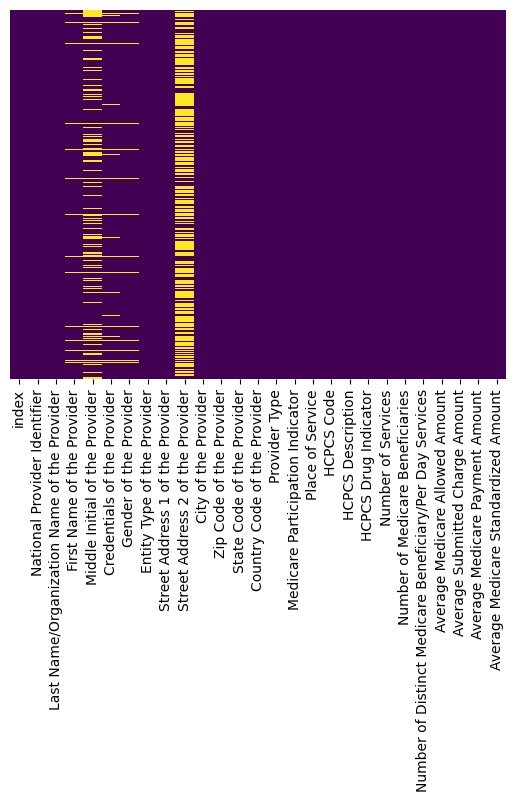

In [5]:
# CHECKING FOR MISSING DATA / NAN VALUES USING HEATMAP 
sns.heatmap(data.isnull(),yticklabels = False,cbar = False , cmap = 'viridis')

From the above plot we can see that two features (Street Address 2 of the Provider and Middle Initial of the Provider) has may nan values or missing data. 

In [6]:
data.drop(['Street Address 2 of the Provider', 'Middle Initial of the Provider'],axis =1 ,inplace = True) 
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,M.D.,F,I,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,M.D.,F,I,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,DPM,M,I,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,MD,M,I,5746 N BROADWAY ST,KANSAS CITY,641183998.0,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,DO,M,I,875 MILITARY TRL,JUPITER,334585700.0,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


For the gender column we can not directy drop this so we can replace the nan values by mode of that column. 

In [7]:
data['Gender of the Provider'].fillna(data['Gender of the Provider'].mode()[0],inplace = True) 

For remaining columns replacing by mode 

In [8]:
for i in data.columns: 
    data[i].fillna(data[i].mode()[0], inplace = True)# REPLACING NAN VALUES BY MODE 

We can drop many columns from the data containing names address etc. because they will not affect anomalies in the data

<Axes: >

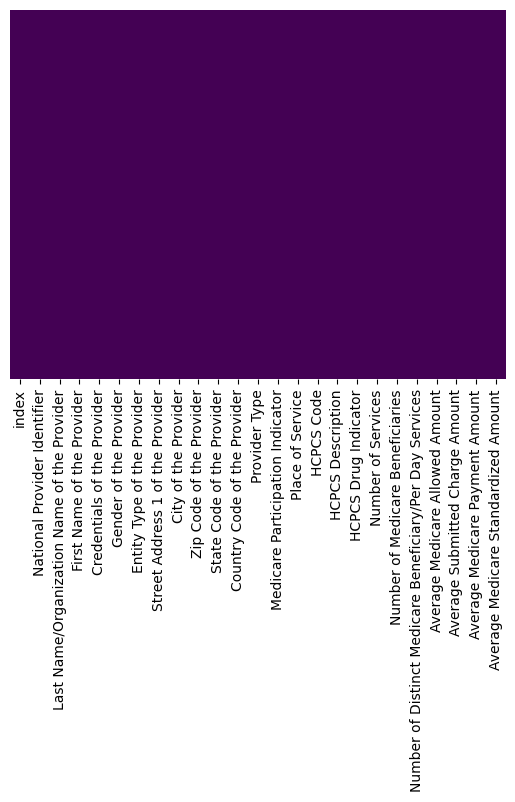

In [9]:
# CHECKING FOR MISSING DATA / NAN VALUES USING HEATMAP 
sns.heatmap(data.isnull(),yticklabels = False,cbar = False , cmap = 'viridis')

In [10]:
# HERE SOME OF THE FEATURES ARE NOT IMPORTANT FOR IDENTIFYING THE ANOMALIES SO WE CAN DROP THESE FEATRES ....
#.... THESE FEATURES ARE CATETGORICAL OR NOMINAL AND HAVE A LARGE NUMBER OF UNIQUE VALUES SO WILL NOT HELP IN CLASSIFICATION AND NAME , ADDRESS ALSO HAVE BEEN DROPPED.
columns_to_drop = ['index','National Provider Identifier','Last Name/Organization Name of the Provider','First Name of the Provider','Street Address 1 of the Provider']
data.drop(columns_to_drop,axis = 1, inplace = True) 

As in the dataset many of the values contains (',','.' etc. in some columns) like [M.D. and MD ] in credentials of the provider column while both are same (as credential is same M.D. or MD) 

In [11]:
i = 'Credentials of the Provider' 
# REPLCAING THE SPECIAL CHARACTERS FROM THE DATA FOR THE COLUMN 'CREDENTIALS OF THE PROVIDER'
for j in range(len(data)): 
        if(type(data[i][j]) == str): 
#             data[i][j] = data[i][j].replace(',','')
            new_str = ''
            for k in range(len(data[i][j])):
                if(ord(data[i][j][k])>=48 and ord(data[i][j][k])<=57):
                    new_str += data[i][j][k] 
                if(ord(data[i][j][k])>=65 and ord(data[i][j][k])<=90):
                    new_str += data[i][j][k] 
                if(ord(data[i][j][k])>=97 and ord(data[i][j][k])<=122):
                    new_str += data[i][j][k]  
            data[i][j] = new_str # repacling each value in the column after removing the special characters.

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\2792408074.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = new_str


In [12]:
data

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,604811236.0,IL,US,Physical Therapist in Private Practice,Y,O,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,ARNP,F,I,REDMOND,977561502.0,OR,US,Nurse Practitioner,Y,O,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,MD,M,I,SAINT LOUIS,631312322.0,MO,US,Cardiology,Y,F,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,MD,F,I,LARCHMONT,105383500.0,NY,US,Internal Medicine,Y,O,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [13]:
# function for converting the string to numeric which is numeric but given string and contains commas  
def convert_to_numeric(data,col): 
    for j in range(len(data)): 
        if(type(data[col][j]) == str):
            data[col][j] = data[col][j].replace(',','')   # replacing commas by null string
    data[i] = data[col].astype('float64')

In [14]:
# The columns need to be converted to numeric data 
cols_to_numeric = data.columns[14:]     
# print(cols_to_numeric)
for i in cols_to_numeric: 
    convert_to_numeric(data,i) 

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\101383403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][j] = data[col][j].replace(',','')


In [15]:
data

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,604811236.0,IL,US,Physical Therapist in Private Practice,Y,O,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,ARNP,F,I,REDMOND,977561502.0,OR,US,Nurse Practitioner,Y,O,99213,Established patient office or other outpatient...,N,136,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,MD,M,I,SAINT LOUIS,631312322.0,MO,US,Cardiology,Y,F,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,MD,F,I,LARCHMONT,105383500.0,NY,US,Internal Medicine,Y,O,G0008,Administration of influenza virus vaccine,N,12,12.0,12.0,30.540000,65.000000,29.930000,25.320000


# Visualising the data

In [16]:
continuous_features = list(data.columns[14:]) # getting a list of continuous features 
categorical_features = [] # list for storing the categorical featres 

for i in data.columns: 
    if i not in continuous_features and i!="Zip Code of the Provider": 
        categorical_features.append(i) 
print(continuous_features) 
print(categorical_features) 


['Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']
['Credentials of the Provider', 'Gender of the Provider', 'Entity Type of the Provider', 'City of the Provider', 'State Code of the Provider', 'Country Code of the Provider', 'Provider Type', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services']


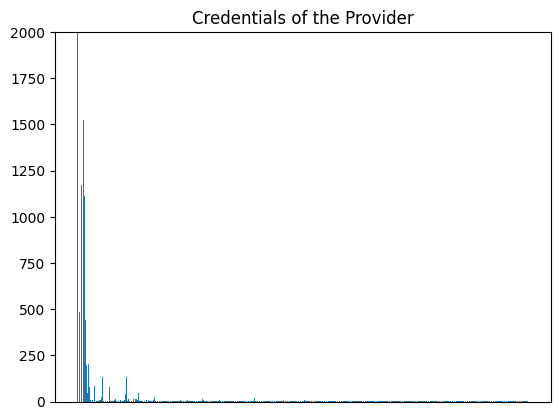

In [17]:
i = 'Credentials of the Provider' 
k = Counter(data[i]) 
plt.title(i)  
plt.ylim([0 ,  2000])
plt.bar(list(k.keys()),list(k.values())) 
plt.xticks([])
plt.show()

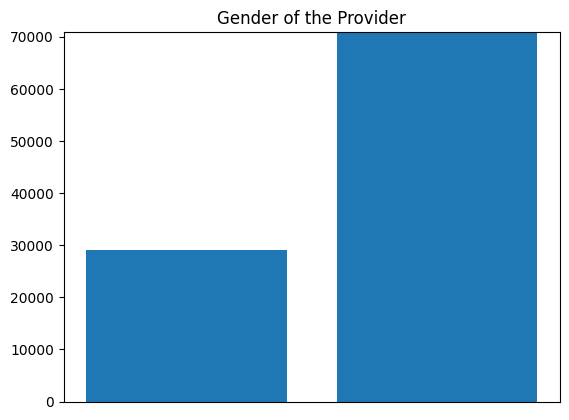

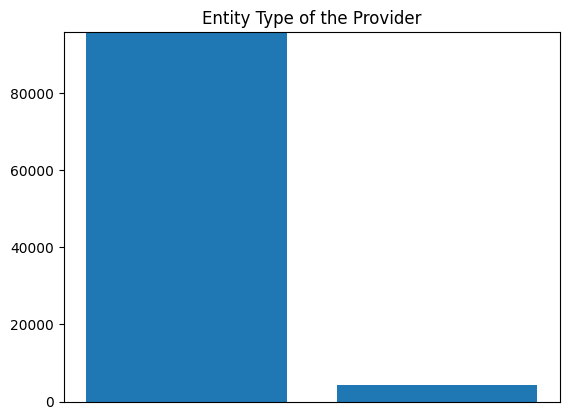

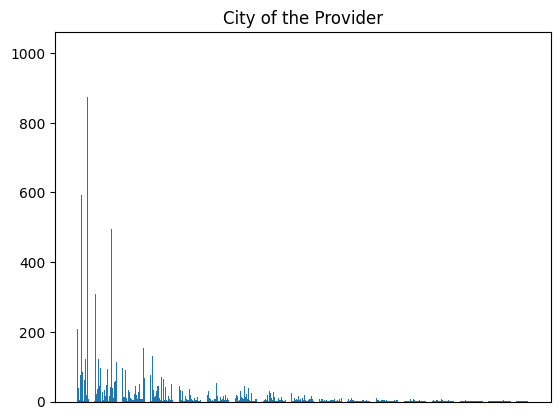

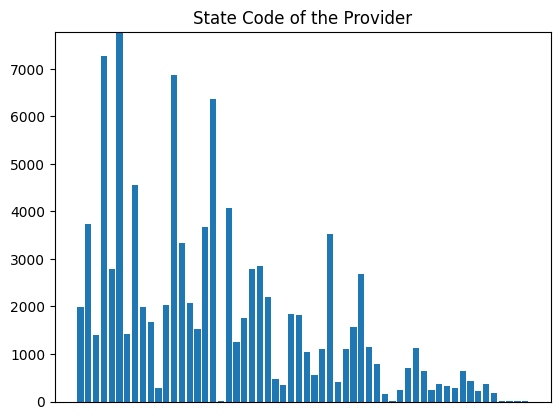

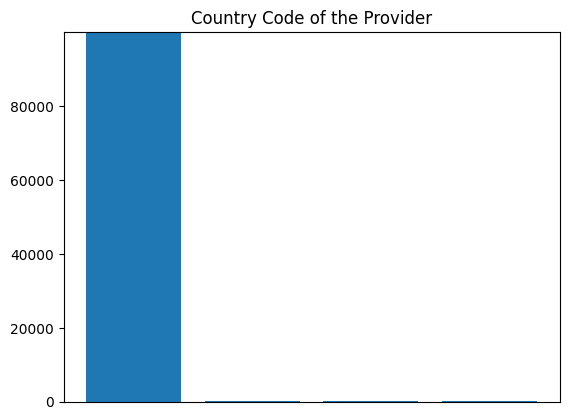

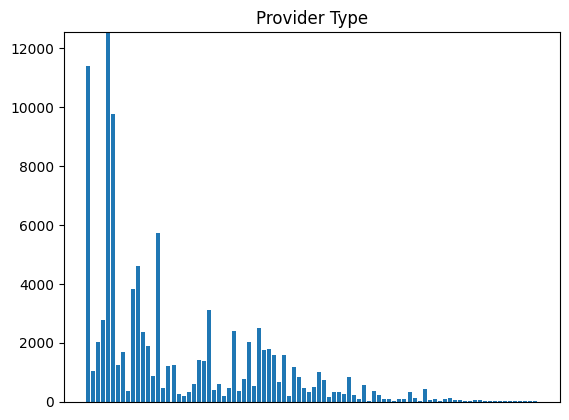

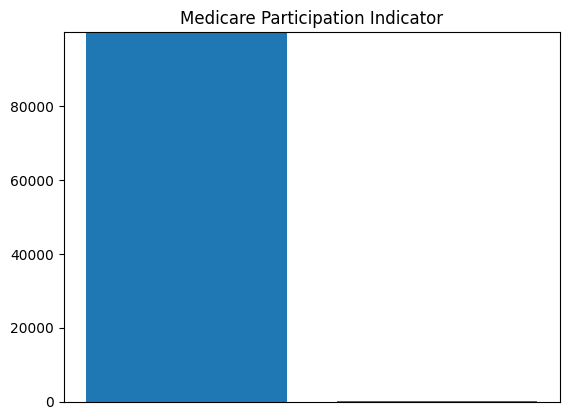

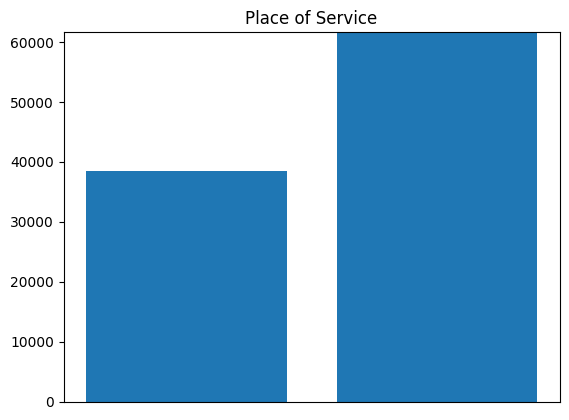

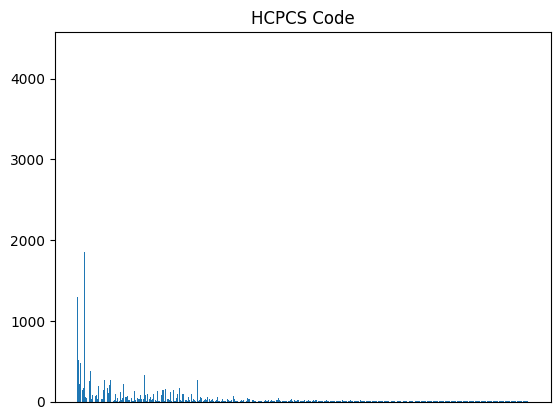

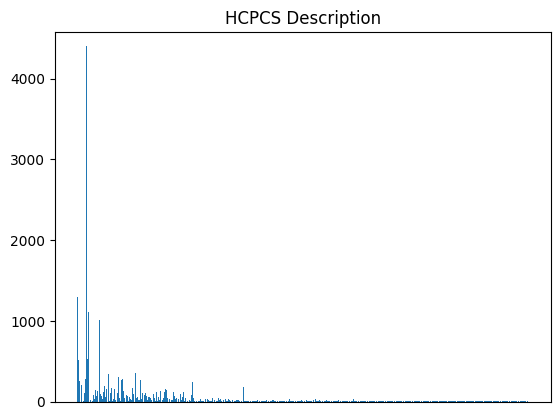

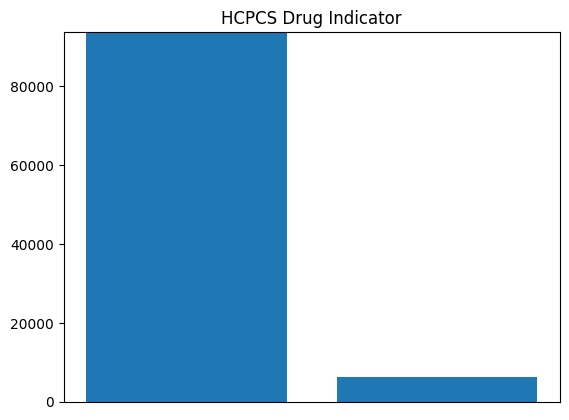

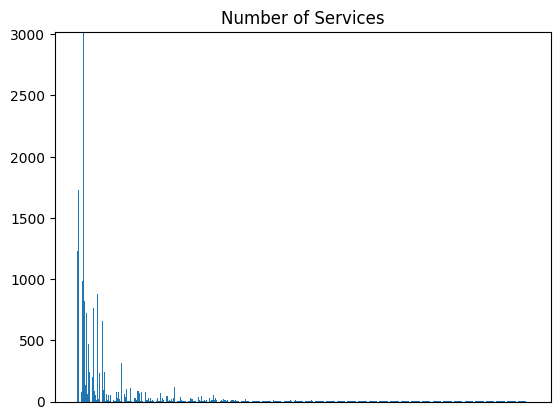

In [18]:
for i in categorical_features: 
    if(i!= 'Credentials of the Provider'): 
        k = Counter(data[i]) 
        plt.title(i)  
        plt.ylim([0 ,  max(list(k.values()))])
        plt.bar(list(k.keys()),list(k.values())) 
        plt.xticks([])
        plt.show()

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1316121836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


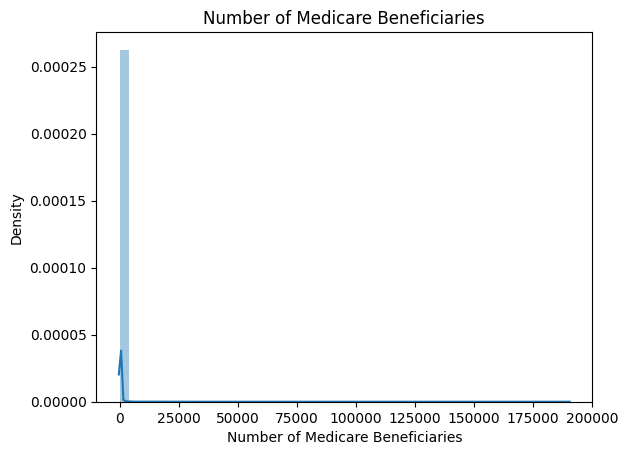

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1316121836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


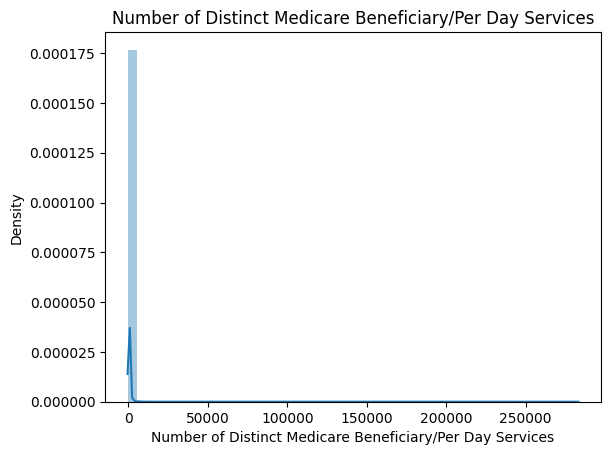

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1316121836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


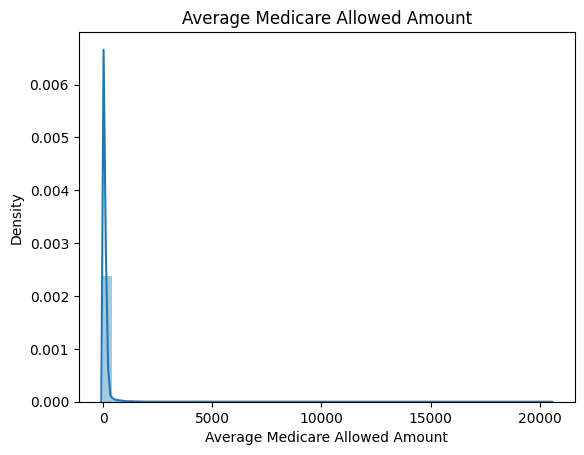

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1316121836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


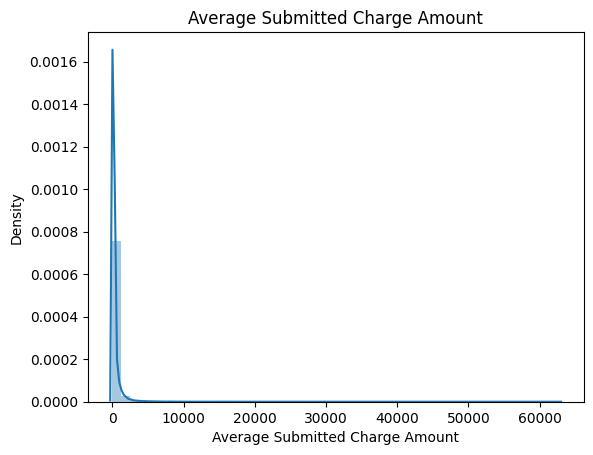

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1316121836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


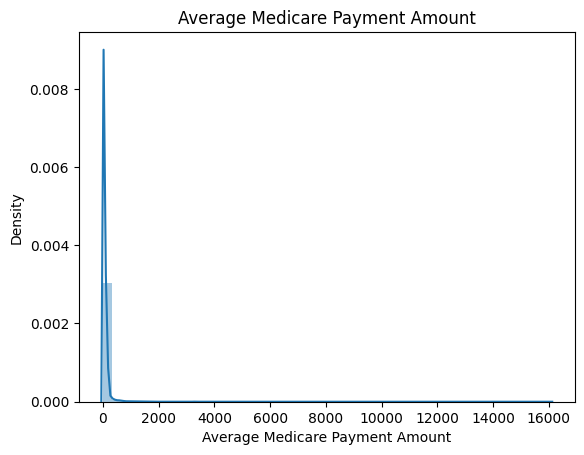

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1316121836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


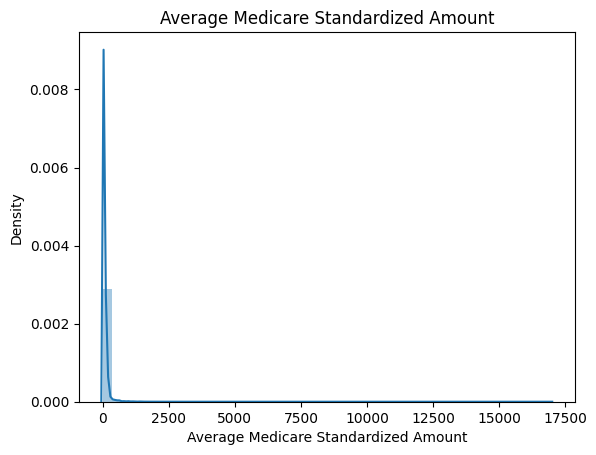

In [19]:
for i in continuous_features: 
    plt.title(i)
#     plt.hist(data[i]) 
    sns.distplot(data[i])
    plt.show()

# Checking the correlation of data for every features  and dropping the features with high correlation 

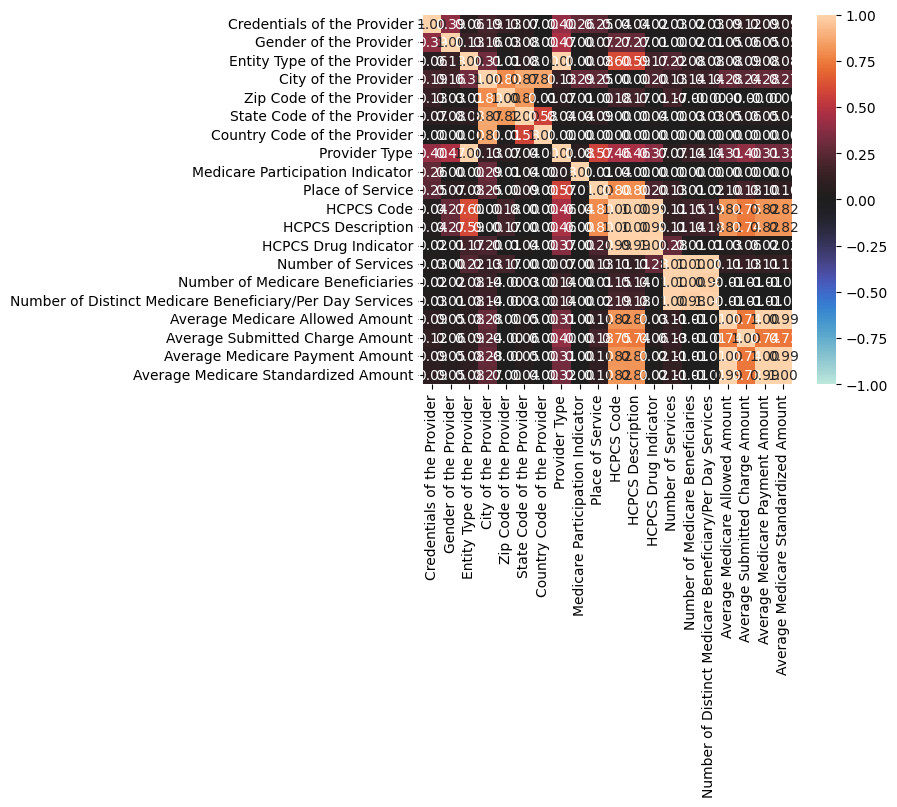

In [20]:
from dython.nominal import associations 
correlations = associations(data)
# plotting the heatmap to check the correlations of the features 

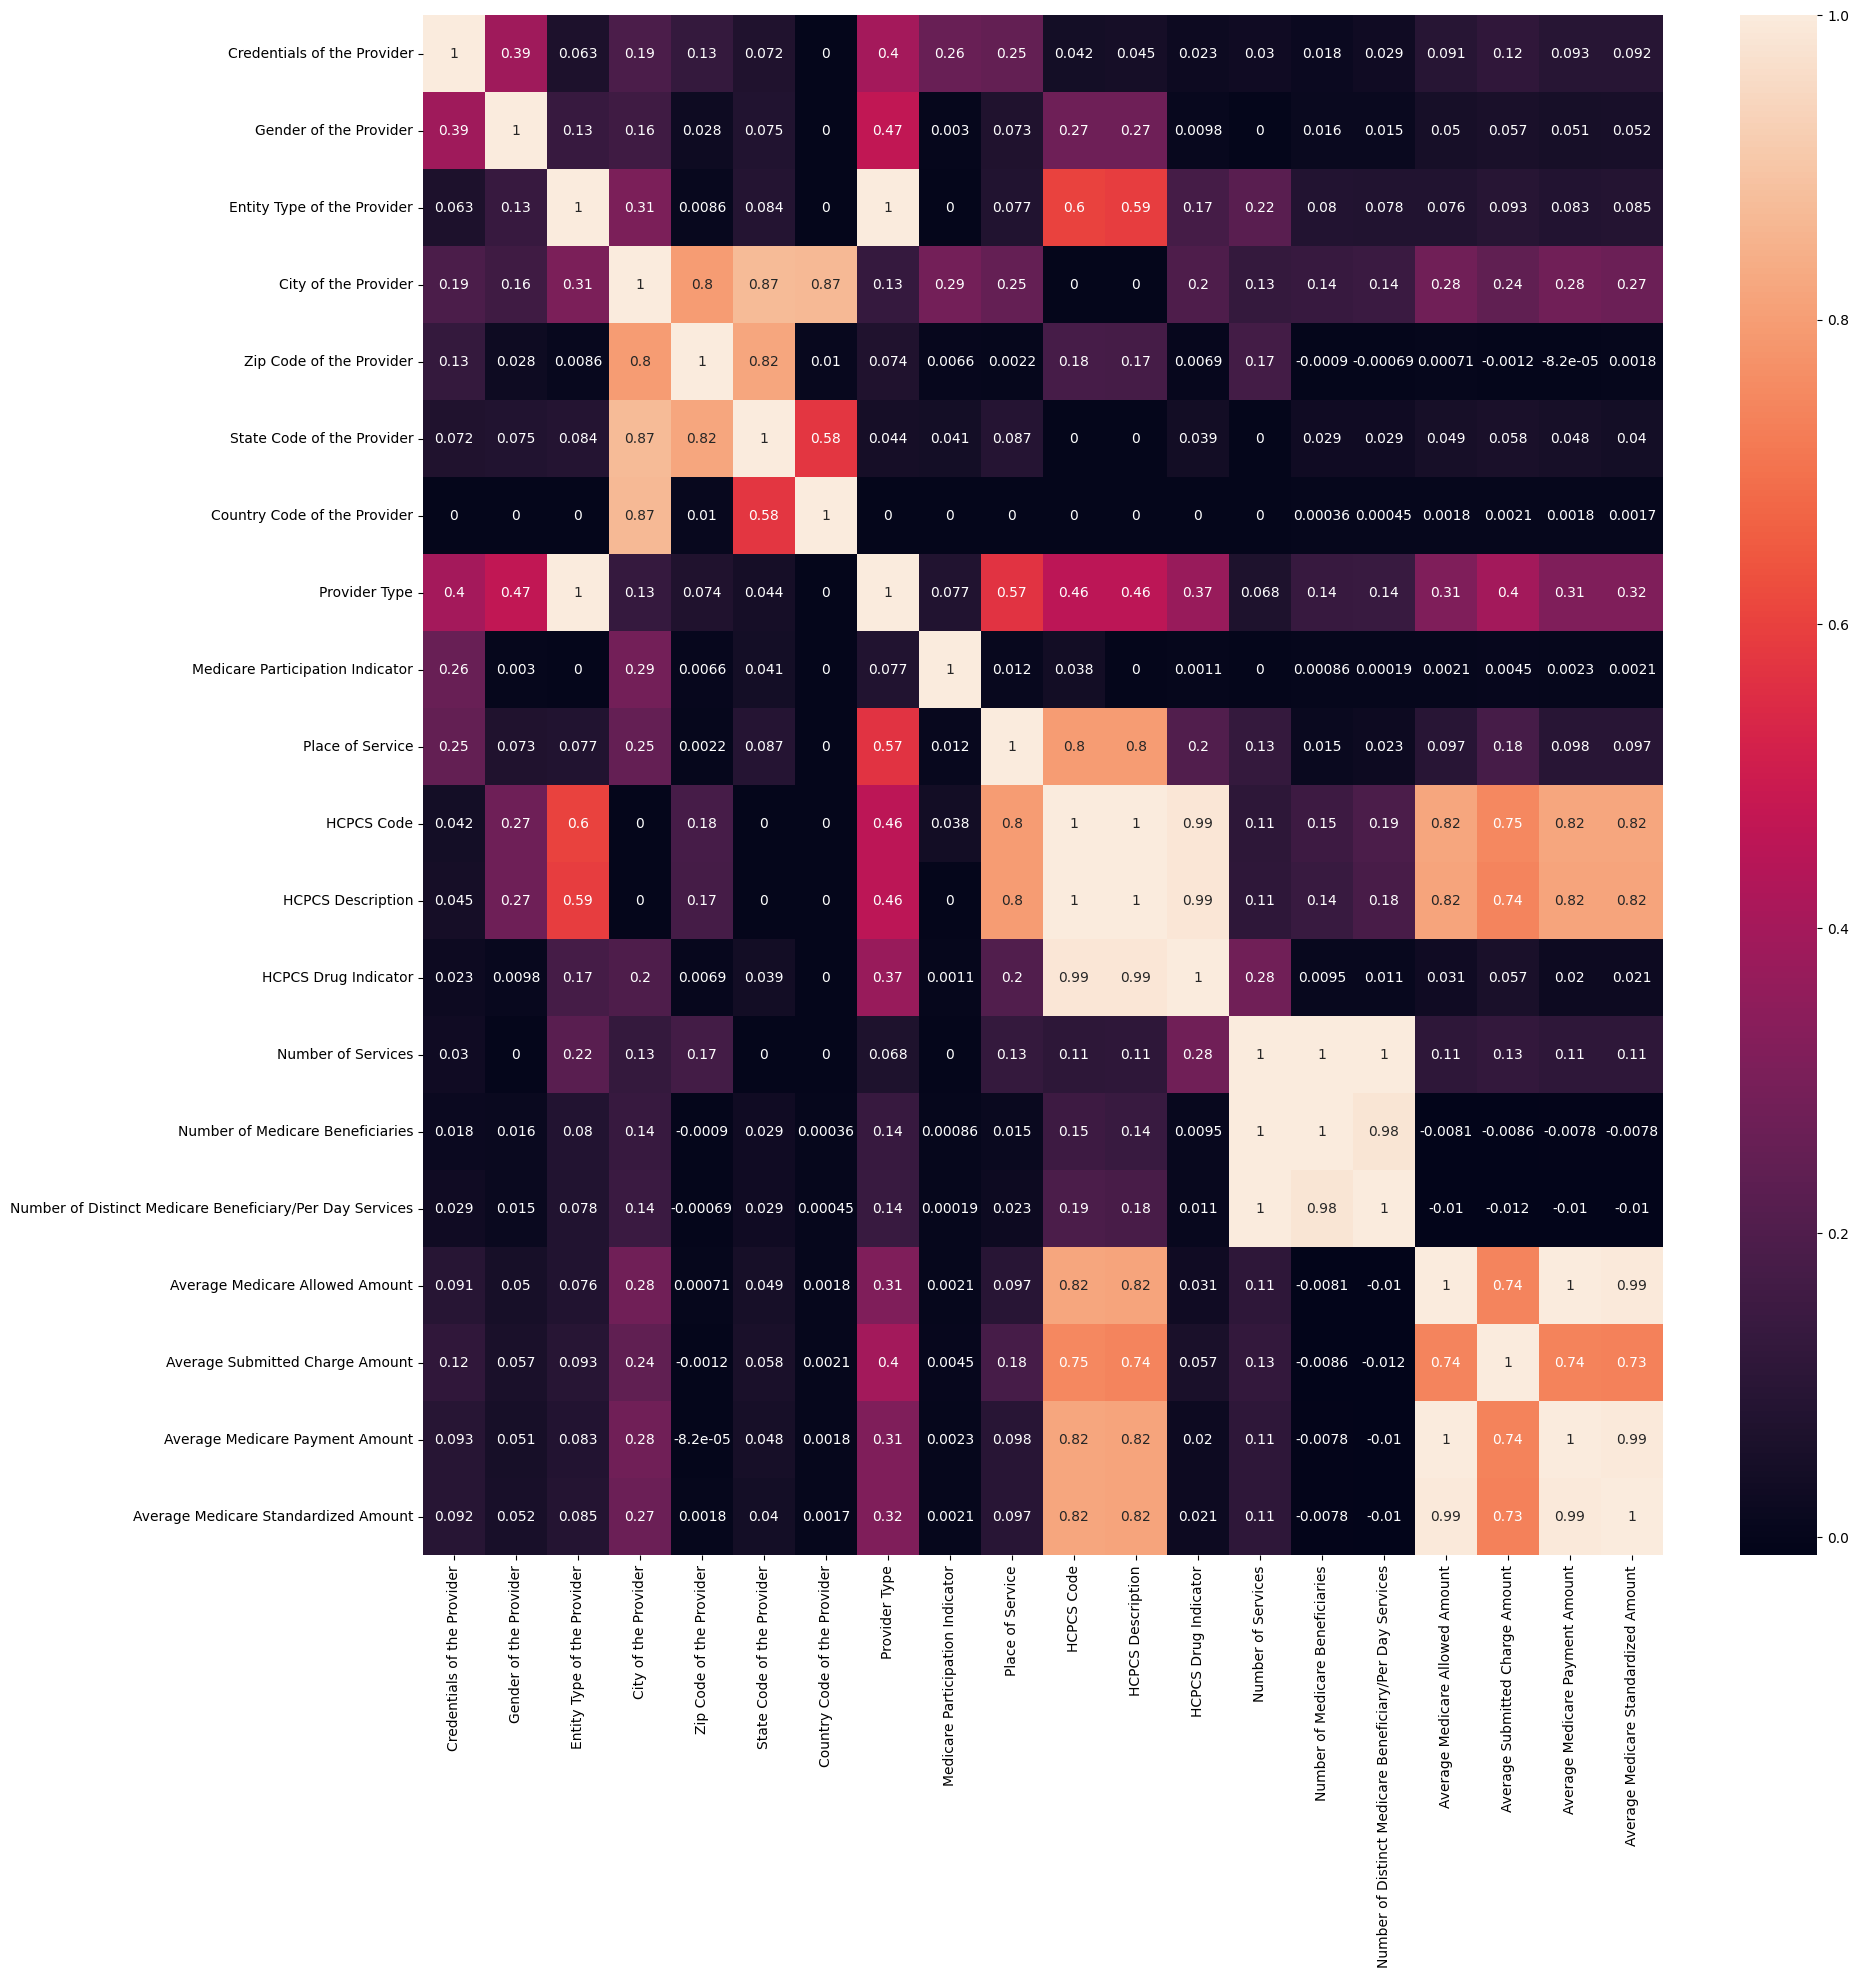

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlations['corr'], annot = True,ax=ax)

# Show the plot
plt.show()

In [22]:
corr = correlations['corr'] 
# correlation matrix 
corr

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
Credentials of the Provider,1.000000,0.387711,0.063397,0.186096,0.128498,0.072327,0.000000,0.402142,0.257993,0.245773,0.041578,0.044977,0.023249,0.029785,0.017791,0.029399,0.091482,0.115397,0.093345,0.091954
Gender of the Provider,0.387711,1.000000,0.134965,0.157175,0.027611,0.075177,0.000000,0.467644,0.002985,0.073364,0.274299,0.274221,0.009766,0.000000,0.015522,0.014681,0.050421,0.056844,0.050602,0.052493
Entity Type of the Provider,0.063397,0.134965,1.000000,0.306922,0.008555,0.083772,0.000000,0.997887,0.000000,0.076998,0.603442,0.591900,0.172146,0.223421,0.080222,0.077863,0.075645,0.093241,0.082867,0.084562
City of the Provider,0.186096,0.157175,0.306922,1.000000,0.796823,0.871784,0.866655,0.131453,0.287342,0.252258,0.000000,0.000000,0.196959,0.127178,0.136328,0.143356,0.279922,0.239692,0.277895,0.265303
Zip Code of the Provider,0.128498,0.027611,0.008555,0.796823,1.000000,0.821852,0.010381,0.073577,0.006596,0.002207,0.177421,0.172230,0.006873,0.168818,-0.000900,-0.000686,0.000707,-0.001192,-0.000082,0.001842
State Code of the Provider,0.072327,0.075177,0.083772,0.871784,0.821852,1.000000,0.576865,0.043736,0.040637,0.087491,0.000000,0.000000,0.038860,0.000000,0.029143,0.028603,0.048607,0.058090,0.048410,0.040049
Country Code of the Provider,0.000000,0.000000,0.000000,0.866655,0.010381,0.576865,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000359,0.000451,0.001787,0.002065,0.001779,0.001682
Provider Type,0.402142,0.467644,0.997887,0.131453,0.073577,0.043736,0.000000,1.000000,0.076695,0.565406,0.458311,0.455948,0.374697,0.067767,0.136230,0.140619,0.314539,0.396505,0.312532,0.315821
Medicare Participation Indicator,0.257993,0.002985,0.000000,0.287342,0.006596,0.040637,0.000000,0.076695,1.000000,0.011728,0.037856,0.000000,0.001101,0.000000,0.000864,0.000192,0.002103,0.004451,0.002285,0.002061
Place of Service,0.245773,0.073364,0.076998,0.252258,0.002207,0.087491,0.000000,0.565406,0.011728,1.000000,0.795930,0.795787,0.202391,0.129081,0.014800,0.022834,0.096720,0.177336,0.098399,0.096973


In [23]:
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        # checking for the correlation between the features if high then we can delete one of them 
        
        if(corr[data.columns[i]][data.columns[j]]>=0.98): 
            print(data.columns[i],"  ->  ",data.columns[j] , ' and correlation  = ',corr[data.columns[i]][data.columns[j]]) 


Entity Type of the Provider   ->   Provider Type  and correlation  =  0.9978872254160679
HCPCS Code   ->   HCPCS Description  and correlation  =  0.9990974449705192
HCPCS Code   ->   HCPCS Drug Indicator  and correlation  =  0.9867671833768509
HCPCS Description   ->   HCPCS Drug Indicator  and correlation  =  0.9874849263612132
Number of Services   ->   Number of Medicare Beneficiaries  and correlation  =  0.9982778502073709
Number of Services   ->   Number of Distinct Medicare Beneficiary/Per Day Services  and correlation  =  0.9991333301674521
Number of Medicare Beneficiaries   ->   Number of Distinct Medicare Beneficiary/Per Day Services  and correlation  =  0.9810718190199162
Average Medicare Allowed Amount   ->   Average Medicare Payment Amount  and correlation  =  0.9987039748961593
Average Medicare Allowed Amount   ->   Average Medicare Standardized Amount  and correlation  =  0.9948313068806548
Average Medicare Payment Amount   ->   Average Medicare Standardized Amount  and cor

From the above output it's clear that we can drop the feature 'Entity Type of the Provider and the others are related to one or more so checking by creating a smaller heatmap for those [First -- (HCPCS Code , HCPCS Description, HCPCS Drug Indicator) and Second -- (Average Medicare Allowed Amount, Average Medicare Payment Amount,Average Medicare Standardized Amount)  and Third -- Number of Services , Number of Distinct Medicare Beneficiary/Per Day Services , Number of Medicare Beneficiaries] 

In [24]:
data.drop(['Entity Type of the Provider'],axis = 1,inplace = True)

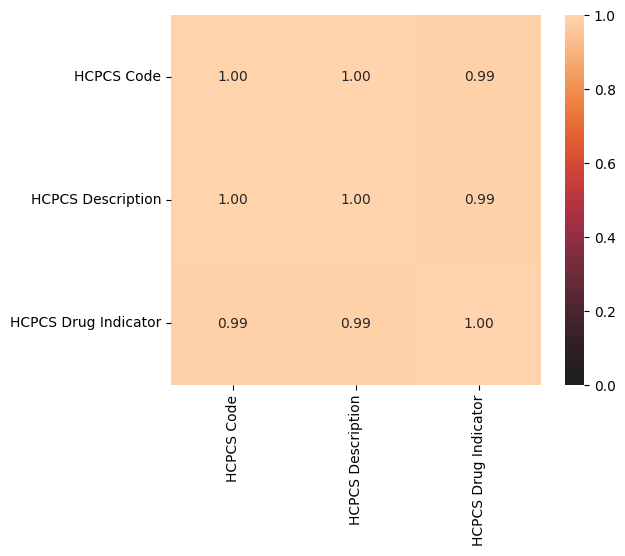

{'corr':                       HCPCS Code  HCPCS Description  HCPCS Drug Indicator
 HCPCS Code              1.000000           0.999097              0.986767
 HCPCS Description       0.999097           1.000000              0.987485
 HCPCS Drug Indicator    0.986767           0.987485              1.000000,
 'ax': <Axes: >}

In [25]:
# For HCPCS Code , HCPCS Description, HCPCS Drug Indicator 
df_temp = data[['HCPCS Code' , 'HCPCS Description', 'HCPCS Drug Indicator']]
associations(df_temp)

Thus from here wee can see that we can keep any of these and drop the others as they have correlation approximately 0.99 and 1 

In [26]:
data.drop(['HCPCS Code','HCPCS Description'],axis = 1,inplace = True)

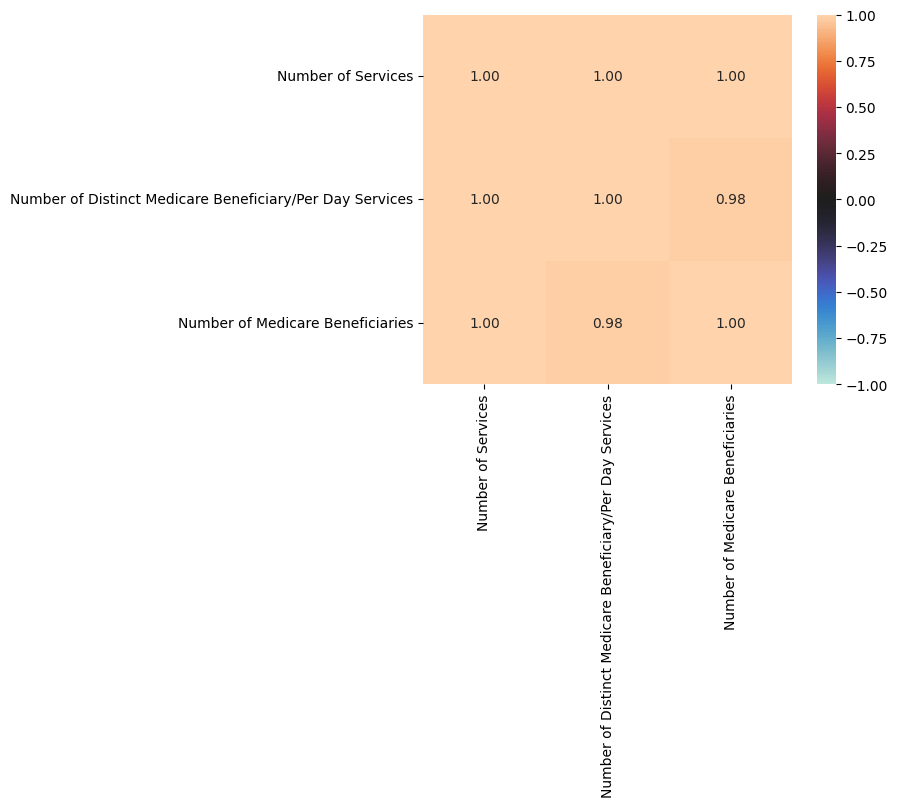

{'corr':                                                     Number of Services  \
 Number of Services                                            1.000000   
 Number of Distinct Medicare Beneficiary/Per Day...            0.999133   
 Number of Medicare Beneficiaries                              0.998278   
 
                                                     Number of Distinct Medicare Beneficiary/Per Day Services  \
 Number of Services                                                                           0.999133          
 Number of Distinct Medicare Beneficiary/Per Day...                                           1.000000          
 Number of Medicare Beneficiaries                                                             0.981072          
 
                                                     Number of Medicare Beneficiaries  
 Number of Services                                                          0.998278  
 Number of Distinct Medicare Beneficiary/Per Day...         

In [27]:
df_temp = data[['Number of Services' , 'Number of Distinct Medicare Beneficiary/Per Day Services' , 'Number of Medicare Beneficiaries']] 
associations(df_temp)

Thus from the above plotted heatmp we can see that these are higly correalted so we can drop the two of these.

In [28]:
data

,Credentials of the Provider,Gender of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,N,27,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,MD,F,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,N,175,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,N,32,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,N,20,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,N,33,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,WILMINGTON,604811236.0,IL,US,Physical Therapist in Private Practice,Y,O,N,20,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,ARNP,F,REDMOND,977561502.0,OR,US,Nurse Practitioner,Y,O,N,136,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,MD,M,SAINT LOUIS,631312322.0,MO,US,Cardiology,Y,F,N,11,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,MD,F,LARCHMONT,105383500.0,NY,US,Internal Medicine,Y,O,N,12,12.0,12.0,30.540000,65.000000,29.930000,25.320000


In [29]:
data.drop(['Number of Services' , 'Number of Distinct Medicare Beneficiary/Per Day Services'],axis = 1,inplace = True)

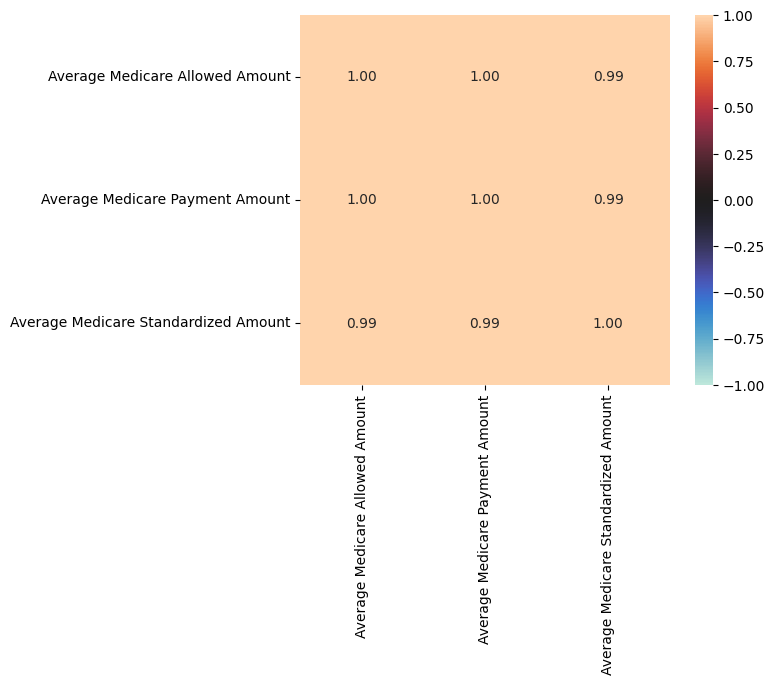

{'corr':                                       Average Medicare Allowed Amount  \
 Average Medicare Allowed Amount                              1.000000   
 Average Medicare Payment Amount                              0.998704   
 Average Medicare Standardized Amount                         0.994831   
 
                                       Average Medicare Payment Amount  \
 Average Medicare Allowed Amount                              0.998704   
 Average Medicare Payment Amount                              1.000000   
 Average Medicare Standardized Amount                         0.994649   
 
                                       Average Medicare Standardized Amount  
 Average Medicare Allowed Amount                                   0.994831  
 Average Medicare Payment Amount                                   0.994649  
 Average Medicare Standardized Amount                              1.000000  ,
 'ax': <Axes: >}

In [30]:
# For Average Medicare Allowed Amount, Average Medicare Payment Amount,Average Medicare Standardized Amount
df_temp = data[['Average Medicare Allowed Amount', 'Average Medicare Payment Amount','Average Medicare Standardized Amount']]
associations(df_temp)

From here again we can drop any two of these features . 

In [31]:
data.drop(['Average Medicare Allowed Amount', 'Average Medicare Payment Amount'],axis = 1,inplace = True) 

In [32]:
data

,Credentials of the Provider,Gender of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,F,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,N,24.0,305.211111,160.908889
1,MD,F,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,N,175.0,548.800000,135.315257
2,DPM,M,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,N,13.0,155.000000,60.595937
3,MD,M,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,N,18.0,5.000000,3.430000
4,DO,M,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,N,24.0,40.000000,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,WILMINGTON,604811236.0,IL,US,Physical Therapist in Private Practice,Y,O,N,20.0,214.000000,62.248500
99996,ARNP,F,REDMOND,977561502.0,OR,US,Nurse Practitioner,Y,O,N,107.0,144.051471,37.040221
99997,MD,M,SAINT LOUIS,631312322.0,MO,US,Cardiology,Y,F,N,11.0,109.545455,14.620000
99998,MD,F,LARCHMONT,105383500.0,NY,US,Internal Medicine,Y,O,N,12.0,65.000000,25.320000


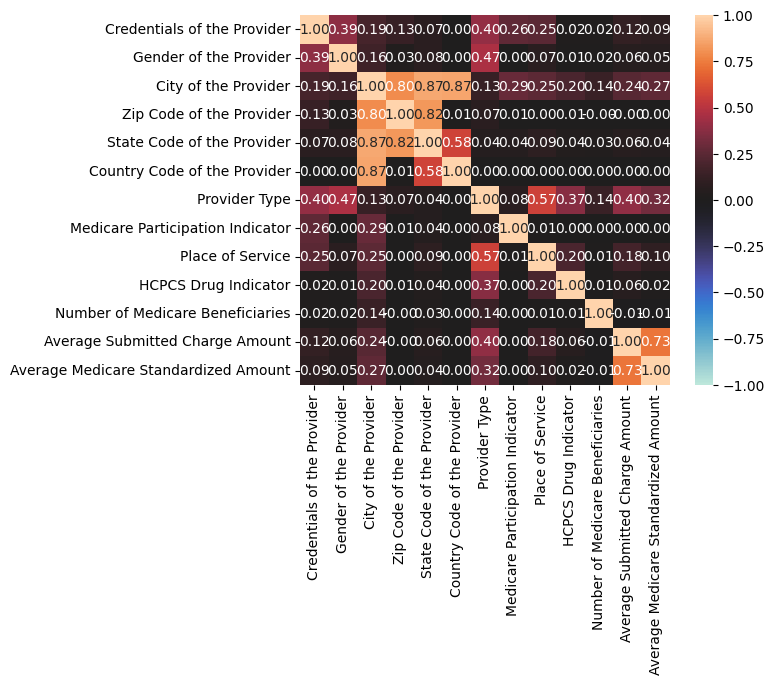

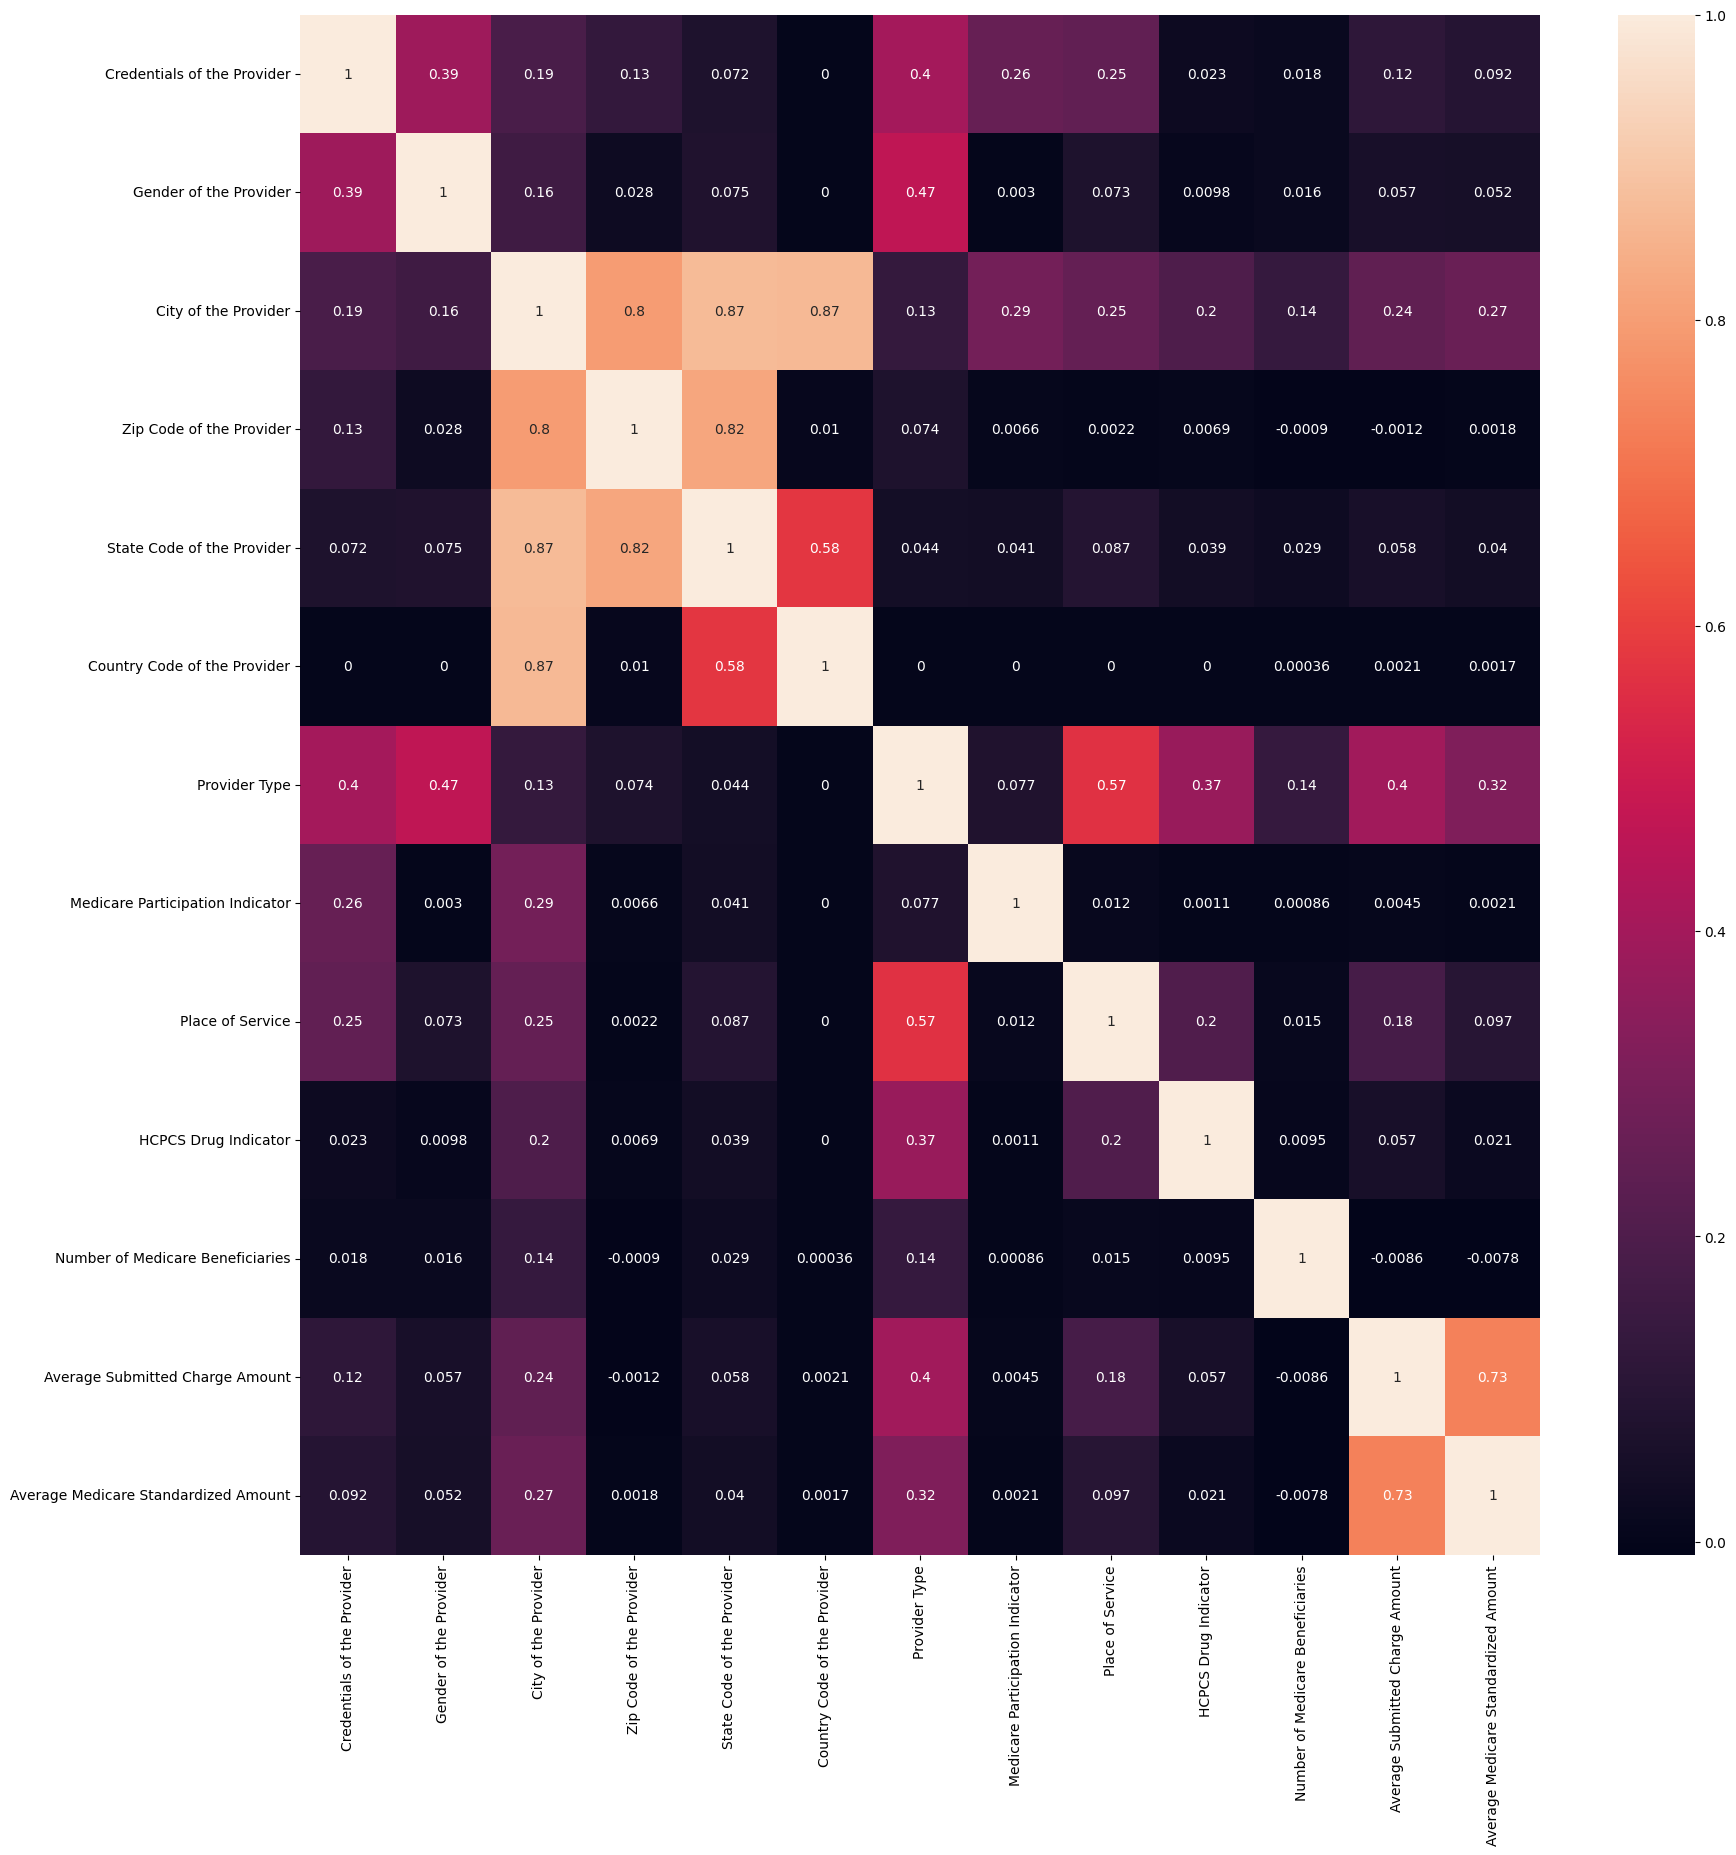

In [33]:
correlations = associations(data)
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlations['corr'], annot = True,ax=ax)

# Show the plot
plt.show()

From the above plotted heatmap we can see that "Zip Code of the Provided" has good correlation with "State Code of the Provider" and "City of the Provider" but not good with "Country Code of the Provider" but "State Code of the Provider" and "City of the Provider" have good with Country Code of the Provider from these we can drop "Zip Code of the Provider" and "City of the Provider" 

In [34]:
data.drop(["Zip Code of the Provider",'City of the Provider'],axis = 1,inplace = True) 
data

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,F,MO,US,Internal Medicine,Y,F,N,24.0,305.211111,160.908889
1,MD,F,NC,US,Obstetrics & Gynecology,Y,O,N,175.0,548.800000,135.315257
2,DPM,M,CT,US,Podiatry,Y,O,N,13.0,155.000000,60.595937
3,MD,M,MO,US,Internal Medicine,Y,O,N,18.0,5.000000,3.430000
4,DO,M,FL,US,Internal Medicine,Y,O,N,24.0,40.000000,19.057576
...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,IL,US,Physical Therapist in Private Practice,Y,O,N,20.0,214.000000,62.248500
99996,ARNP,F,OR,US,Nurse Practitioner,Y,O,N,107.0,144.051471,37.040221
99997,MD,M,MO,US,Cardiology,Y,F,N,11.0,109.545455,14.620000
99998,MD,F,NY,US,Internal Medicine,Y,O,N,12.0,65.000000,25.320000


In [35]:
data_copy = data.copy() 

In [36]:
Encodings = {}

In [37]:
data_copy

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,F,MO,US,Internal Medicine,Y,F,N,24.0,305.211111,160.908889
1,MD,F,NC,US,Obstetrics & Gynecology,Y,O,N,175.0,548.800000,135.315257
2,DPM,M,CT,US,Podiatry,Y,O,N,13.0,155.000000,60.595937
3,MD,M,MO,US,Internal Medicine,Y,O,N,18.0,5.000000,3.430000
4,DO,M,FL,US,Internal Medicine,Y,O,N,24.0,40.000000,19.057576
...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,IL,US,Physical Therapist in Private Practice,Y,O,N,20.0,214.000000,62.248500
99996,ARNP,F,OR,US,Nurse Practitioner,Y,O,N,107.0,144.051471,37.040221
99997,MD,M,MO,US,Cardiology,Y,F,N,11.0,109.545455,14.620000
99998,MD,F,NY,US,Internal Medicine,Y,O,N,12.0,65.000000,25.320000


In [38]:
df = data.copy()

# Encoding the data and standardising the data 

In [39]:
categorical_features = list(data.columns[0:8]) 
continuous_features = list(data.columns[8:]) 

In [40]:
standardizations = {} 
standardizations['mean'] = {}
standardizations['mean']['Number of Medicare Beneficiaries'] = data['Number of Medicare Beneficiaries'].mean()
standardizations['mean']['Average Submitted Charge Amount']   = data['Average Submitted Charge Amount'].mean()
standardizations['mean']['Average Medicare Standardized Amount']   = data['Average Medicare Standardized Amount'].mean()
standardizations['std'] = {}
standardizations['std']['Number of Medicare Beneficiaries'] = data['Number of Medicare Beneficiaries'].std()
standardizations['std']['Average Submitted Charge Amount']   = data['Average Submitted Charge Amount'].std()
standardizations['std']['Average Medicare Standardized Amount']   = data['Average Medicare Standardized Amount'].std()


In [41]:
standardizations

{'mean': {'Number of Medicare Beneficiaries': 89.80931,
  'Average Submitted Charge Amount': 354.55045081579567,
  'Average Medicare Standardized Amount': 78.03069297594605},
 'std': {'Number of Medicare Beneficiaries': 1109.616901666514,
  'Average Submitted Charge Amount': 1062.6082712547693,
  'Average Medicare Standardized Amount': 200.04545774030595}}

In [42]:
for i in categorical_features:
    print(i,"-->",len(data[i].unique())) 

Credentials of the Provider --> 1145
Gender of the Provider --> 2
State Code of the Provider --> 58
Country Code of the Provider --> 4
Provider Type --> 90
Medicare Participation Indicator --> 2
Place of Service --> 2
HCPCS Drug Indicator --> 2


For the columns "Gender of the Provider" , "Country Code of the Provider " , " Medicare Participation Indicator" , "Place of Service " "HCPCS Drug Indicator" we can provide labels as count are less using label encoder. 

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
cols = ["Gender of the Provider" , "Country Code of the Provider" , "Medicare Participation Indicator" , "Place of Service" ,"HCPCS Drug Indicator"] 
le = LabelEncoder() 
for i in cols: 
    print(i,"  --  ",dict(Counter(data[i]))) 
    

Gender of the Provider   --   {'F': 29105, 'M': 70895}
Country Code of the Provider   --   {'US': 99994, 'JP': 2, 'DE': 3, 'TR': 1}
Medicare Participation Indicator   --   {'Y': 99969, 'N': 31}
Place of Service   --   {'F': 38384, 'O': 61616}
HCPCS Drug Indicator   --   {'N': 93802, 'Y': 6198}


In [45]:
Encodings

{}

In [46]:
data

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,F,MO,US,Internal Medicine,Y,F,N,24.0,305.211111,160.908889
1,MD,F,NC,US,Obstetrics & Gynecology,Y,O,N,175.0,548.800000,135.315257
2,DPM,M,CT,US,Podiatry,Y,O,N,13.0,155.000000,60.595937
3,MD,M,MO,US,Internal Medicine,Y,O,N,18.0,5.000000,3.430000
4,DO,M,FL,US,Internal Medicine,Y,O,N,24.0,40.000000,19.057576
...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,IL,US,Physical Therapist in Private Practice,Y,O,N,20.0,214.000000,62.248500
99996,ARNP,F,OR,US,Nurse Practitioner,Y,O,N,107.0,144.051471,37.040221
99997,MD,M,MO,US,Cardiology,Y,F,N,11.0,109.545455,14.620000
99998,MD,F,NY,US,Internal Medicine,Y,O,N,12.0,65.000000,25.320000


In [47]:
data_copy1 = data.copy()

For the columns country code of the provider there is one country (US) is most occrring more than 99.99% so for rest we can put in a separate label like others for all other country than US and others can be treated as another group of countries and can be represented by a single encoder.  

In [48]:
feature = 'Country Code of the Provider' 
for i in range(len(data)):
    if(data[feature][i] == 'US'): 
        data[feature][i] = 0 
    else:
        data[feature][i] = 1   # encoding the countries other than US as 1 
Encodings[feature] = {'US' : 0,'others' :1 }
data[feature].astype('int64')

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\2393213841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature][i] = 0
C:\Users\91860\AppData\Local\Temp\ipykernel_16500\2393213841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature][i] = 1


0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Country Code of the Provider, Length: 100000, dtype: int64

In [49]:
print(Encodings)

{'Country Code of the Provider': {'US': 0, 'others': 1}}


In [50]:
data

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,F,MO,0,Internal Medicine,Y,F,N,24.0,305.211111,160.908889
1,MD,F,NC,0,Obstetrics & Gynecology,Y,O,N,175.0,548.800000,135.315257
2,DPM,M,CT,0,Podiatry,Y,O,N,13.0,155.000000,60.595937
3,MD,M,MO,0,Internal Medicine,Y,O,N,18.0,5.000000,3.430000
4,DO,M,FL,0,Internal Medicine,Y,O,N,24.0,40.000000,19.057576
...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,IL,0,Physical Therapist in Private Practice,Y,O,N,20.0,214.000000,62.248500
99996,ARNP,F,OR,0,Nurse Practitioner,Y,O,N,107.0,144.051471,37.040221
99997,MD,M,MO,0,Cardiology,Y,F,N,11.0,109.545455,14.620000
99998,MD,F,NY,0,Internal Medicine,Y,O,N,12.0,65.000000,25.320000


In [51]:
data

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,F,MO,0,Internal Medicine,Y,F,N,24.0,305.211111,160.908889
1,MD,F,NC,0,Obstetrics & Gynecology,Y,O,N,175.0,548.800000,135.315257
2,DPM,M,CT,0,Podiatry,Y,O,N,13.0,155.000000,60.595937
3,MD,M,MO,0,Internal Medicine,Y,O,N,18.0,5.000000,3.430000
4,DO,M,FL,0,Internal Medicine,Y,O,N,24.0,40.000000,19.057576
...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,IL,0,Physical Therapist in Private Practice,Y,O,N,20.0,214.000000,62.248500
99996,ARNP,F,OR,0,Nurse Practitioner,Y,O,N,107.0,144.051471,37.040221
99997,MD,M,MO,0,Cardiology,Y,F,N,11.0,109.545455,14.620000
99998,MD,F,NY,0,Internal Medicine,Y,O,N,12.0,65.000000,25.320000


Encoding the columns with less number of unique values ( ["Gender of the Provider" , "Medicare Participation Indicator" , "Place of Service" ,"HCPCS Drug Indicator"] ) 

In [52]:
cols = ["Gender of the Provider", "Medicare Participation Indicator" , "Place of Service" ,"HCPCS Drug Indicator"]   

for i in cols:
    encod = 0 
    dict_encod = {}
    for j in range(len(data)): 
        if(data[i][j] not in dict_encod): 
            dict_encod[data[i][j]] = encod
            encod+=1 
        data[i][j] = dict_encod[data[i][j]]  
    Encodings[i] = dict_encod
    data[i].astype('int64') 


C:\Users\91860\AppData\Local\Temp\ipykernel_16500\4219924369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = dict_encod[data[i][j]]


In [53]:
Encodings

{'Country Code of the Provider': {'US': 0, 'others': 1},
 'Gender of the Provider': {'F': 0, 'M': 1},
 'Medicare Participation Indicator': {'Y': 0, 'N': 1},
 'Place of Service': {'F': 0, 'O': 1},
 'HCPCS Drug Indicator': {'N': 0, 'Y': 1}}

In [54]:
data

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,0,MO,0,Internal Medicine,0,0,0,24.0,305.211111,160.908889
1,MD,0,NC,0,Obstetrics & Gynecology,0,1,0,175.0,548.800000,135.315257
2,DPM,1,CT,0,Podiatry,0,1,0,13.0,155.000000,60.595937
3,MD,1,MO,0,Internal Medicine,0,1,0,18.0,5.000000,3.430000
4,DO,1,FL,0,Internal Medicine,0,1,0,24.0,40.000000,19.057576
...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,0,IL,0,Physical Therapist in Private Practice,0,1,0,20.0,214.000000,62.248500
99996,ARNP,0,OR,0,Nurse Practitioner,0,1,0,107.0,144.051471,37.040221
99997,MD,1,MO,0,Cardiology,0,0,0,11.0,109.545455,14.620000
99998,MD,0,NY,0,Internal Medicine,0,1,0,12.0,65.000000,25.320000


For the remaining categorical features let's see how the data is distributed for each of the columns.

[Credentials of the Provider --> 1145,
State Code of the Provider --> 58,
Provider Type --> 90]

In [55]:
def sort_dict_by_value(Dict): 
    keys = list(Dict.keys())
    values = list(Dict.values())
    indexes = np.argsort(values)[::-1]
    new_dict = {} 
    for i in range(len(indexes)): 
        new_dict[keys[indexes[i]]] = values[indexes[i]]  
    return new_dict

In [56]:
# FOR 'CREDENTIALS OF THE PROVIDER'  
column = data['Credentials of the Provider'] 
column_counter = dict(Counter(column))  
# sorting this dictionary in the decreaseing order of count ( values of dictionary ) so that we can get which ...
# ... value is occuring most of th times and how the values are throughout this column 
column_counter = sort_dict_by_value(column_counter) 
print(column_counter)

{'MD': 74187, 'DO': 6211, 'PAC': 2203, 'DPM': 1925, 'OD': 1524, 'PA': 1174, 'PT': 1114, 'CRNA': 1027, 'NP': 1007, 'FNP': 712, 'DPT': 709, 'MDPHD': 661, 'ARNP': 487, 'APRN': 442, 'DC': 424, 'CRNP': 295, 'FNPC': 269, 'NPC': 250, 'PHD': 211, 'MDMPH': 203, 'FNPBC': 198, 'PTDPT': 193, 'CNP': 169, 'APN': 160, 'LCSW': 132, 'MPT': 131, 'MBBS': 109, 'AUD': 106, 'MDFACC': 85, 'PSYD': 82, 'ANP': 81, 'CFNP': 81, 'MSPT': 71, 'MDFACS': 69, 'OT': 64, 'MDPA': 63, 'RPAC': 61, 'MDMS': 59, 'APNP': 57, 'PHYSICIANASSISTANT': 50, 'OTRL': 50, 'MDMBA': 49, 'NURSEPRACTITIONER': 49, 'MDFACP': 46, 'RPT': 44, 'ACNP': 42, 'RN': 38, 'APRNBC': 34, 'ANPBC': 29, 'OTR': 28, 'LICSW': 27, 'MSPAC': 26, 'DDS': 25, 'PHYSICALTHERAPIST': 25, 'OTRLCHT': 24, 'DNP': 23, 'MDPC': 22, 'MBBSMD': 22, 'MPASPAC': 20, 'APRNFNPC': 20, 'RNCNP': 19, 'AA': 18, 'ARNPC': 17, 'MSNFNPBC': 17, 'APRNFNPBC': 16, 'PHDMD': 16, 'MS': 16, 'APRNCNP': 16, 'AGACNPBC': 15, 'PMHNP': 15, 'ACNPBC': 15, 'MEDICALDOCTOR': 14, 'MSW': 14, 'MDFCCP': 14, 'DOMPH': 1

So from above we can see that some of the values in this column has very less count so we can group them as others ( for less than 500) 

In [57]:
df = data.copy() 
df.head()

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,MD,0,MO,0,Internal Medicine,0,0,0,24.0,305.211111,160.908889
1,MD,0,NC,0,Obstetrics & Gynecology,0,1,0,175.0,548.800000,135.315257
2,DPM,1,CT,0,Podiatry,0,1,0,13.0,155.000000,60.595937
3,MD,1,MO,0,Internal Medicine,0,1,0,18.0,5.000000,3.430000
4,DO,1,FL,0,Internal Medicine,0,1,0,24.0,40.000000,19.057576


In [58]:
def encode_by_threshold(data,column,threshold): # For less than threshold labelling as 0 
    j = 1   
    labels = {}
    column_counter = Counter(data[column])
    for i in range(len(data)): 
        if(column_counter[data[column][i]]<threshold):  
            labels['others'] = 0  # if less than threshold then encoding as 0 
            data[column][i] = 0 
        else:
            if data[column][i] not in labels: 
                labels[data[column][i]] = j  # if greather than or equal to threshol then encoding by 1 , 2 ,3 
                j+=1 
            data[column][i] = labels[data[column][i]]
    return data,labels

In [59]:
data,dictionary = encode_by_threshold(data,"Credentials of the Provider",500)  
Encodings["Credentials of the Provider"] = dictionary
Encodings

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1647811930.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = labels[data[column][i]]
C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1647811930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = 0


{'Country Code of the Provider': {'US': 0, 'others': 1},
 'Gender of the Provider': {'F': 0, 'M': 1},
 'Medicare Participation Indicator': {'Y': 0, 'N': 1},
 'Place of Service': {'F': 0, 'O': 1},
 'HCPCS Drug Indicator': {'N': 0, 'Y': 1},
 'Credentials of the Provider': {'MD': 1,
  'DPM': 2,
  'DO': 3,
  'DPT': 4,
  'PAC': 5,
  'others': 0,
  'CRNA': 6,
  'FNP': 7,
  'PA': 8,
  'OD': 9,
  'PT': 10,
  'MDPHD': 11,
  'NP': 12}}

In [60]:
data.head()

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,1,0,MO,0,Internal Medicine,0,0,0,24.0,305.211111,160.908889
1,1,0,NC,0,Obstetrics & Gynecology,0,1,0,175.0,548.800000,135.315257
2,2,1,CT,0,Podiatry,0,1,0,13.0,155.000000,60.595937
3,1,1,MO,0,Internal Medicine,0,1,0,18.0,5.000000,3.430000
4,3,1,FL,0,Internal Medicine,0,1,0,24.0,40.000000,19.057576


In [61]:

# FOR 'STATE CODE OF THE PROVIDER'  
column = data["State Code of the Provider" ] 
column_counter = dict(Counter(column))  
# sorting this dictionary in the decreaseing order of count ( values of dictionary ) so that we can get which ...
# ... value is occuring most of th times and how the values are throughout this column 
column_counter = sort_dict_by_value(column_counter) 
print(column_counter)

{'CA': 7775, 'FL': 7263, 'TX': 6861, 'NY': 6361, 'PA': 4561, 'IL': 4073, 'NC': 3725, 'OH': 3663, 'MI': 3516, 'NJ': 3333, 'GA': 2858, 'VA': 2792, 'MA': 2791, 'TN': 2673, 'IN': 2203, 'MD': 2076, 'WA': 2020, 'MO': 1997, 'AZ': 1994, 'WI': 1840, 'AL': 1821, 'SC': 1753, 'KY': 1667, 'MN': 1563, 'LA': 1520, 'CO': 1423, 'CT': 1403, 'OK': 1250, 'IA': 1136, 'AR': 1130, 'KS': 1109, 'MS': 1108, 'OR': 1046, 'NE': 787, 'NV': 707, 'WV': 644, 'UT': 640, 'NH': 547, 'ME': 466, 'NM': 421, 'ID': 415, 'DE': 378, 'RI': 359, 'MT': 345, 'SD': 326, 'PR': 284, 'DC': 275, 'HI': 249, 'VT': 239, 'ND': 231, 'WY': 171, 'AK': 165, 'VI': 20, 'GU': 15, 'ZZ': 6, 'AP': 3, 'AE': 2, 'AA': 1}


Here consider the threshold as 2500 for labeling 

In [62]:
data,dictionary = encode_by_threshold(data,"State Code of the Provider",2500) 
Encodings["State Code of the Provider"] = dictionary

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1647811930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = 0
C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1647811930.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = labels[data[column][i]]


In [63]:

# FOR 'Provider Type'  
column = data["Provider Type" ] 
column_counter = dict(Counter(column))  
# sorting this dictionary in the decreaseing order of count ( values of dictionary ) so that we can get which ...
# ... value is occuring most of th times and how the values are throughout this column 
column_counter = sort_dict_by_value(column_counter) 
print(column_counter)

{'Diagnostic Radiology': 12537, 'Internal Medicine': 11366, 'Family Practice': 9760, 'Nurse Practitioner': 5713, 'Cardiology': 4602, 'Physician Assistant': 3818, 'Orthopedic Surgery': 3098, 'Physical Therapist in Private Practice': 2780, 'Ophthalmology': 2495, 'Emergency Medicine': 2377, 'Anesthesiology': 2351, 'Podiatry': 2027, 'Dermatology': 2022, 'Gastroenterology': 1898, 'Urology': 1794, 'Hematology-Oncology': 1745, 'General Surgery': 1667, 'Optometry': 1585, 'Pathology': 1564, 'Pulmonary Disease': 1396, 'Neurology': 1380, 'Clinical Laboratory': 1240, 'Mass Immunizer Roster Biller': 1234, 'Certified Registered Nurse Anesthetist (CRNA)': 1200, 'Nephrology': 1162, 'Obstetrics & Gynecology': 1028, 'Otolaryngology': 999, 'Psychiatry': 850, 'Radiation Oncology': 834, 'Physical Medicine and Rehabilitation': 834, 'Interventional Cardiology': 776, 'Rheumatology': 727, 'Vascular Surgery': 650, 'Clinical Cardiac Electrophysiology': 606, 'Medical Oncology': 578, 'Endocrinology': 562, 'Ambulat

Considering the threshold as 1000 and labelling the features 

In [64]:
data,dictionary = encode_by_threshold(data,"Provider Type",1000)
Encodings["Provider Type"] = dictionary

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1647811930.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = labels[data[column][i]]
C:\Users\91860\AppData\Local\Temp\ipykernel_16500\1647811930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = 0


In [65]:
data.head() 

,Credentials of the Provider,Gender of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount
0,1,0,0,0,1,0,0,0,24.0,305.211111,160.908889
1,1,0,1,0,2,0,1,0,175.0,548.800000,135.315257
2,2,1,0,0,3,0,1,0,13.0,155.000000,60.595937
3,1,1,0,0,1,0,1,0,18.0,5.000000,3.430000
4,3,1,2,0,1,0,1,0,24.0,40.000000,19.057576


In [66]:
# Standardising the continuous features using standard scaler 
from sklearn.preprocessing import StandardScaler 
cols_to_scale = data.columns[8:]  
for i in cols_to_scale: 
    scaler = StandardScaler() 
    df_temp = np.array(data[i]).reshape(-1,1) 
    df_temp = scaler.fit_transform(df_temp).reshape(len(data),)
    data[i] = df_temp

In [67]:
# ONE HOT ENCODING THE DATA FOR CATEGORICAL FEATURES with more than 2 unique values (if not binary )
features_to_encode_one_hot = ['Credentials of the Provider', 'State Code of the Provider', 'Provider Type']
df_temp = data
one_hot_encoded_data = pd.get_dummies(df_temp,columns = features_to_encode_one_hot) 
one_hot_encoded_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Gender of the Provider,Country Code of the Provider,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount,Credentials of the Provider_0,Credentials of the Provider_1,...,Provider Type_17,Provider Type_18,Provider Type_19,Provider Type_20,Provider Type_21,Provider Type_22,Provider Type_23,Provider Type_24,Provider Type_25,Provider Type_26
0,0,0,0,0,0,-0.059308,-0.046433,0.414299,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0.076775,0.182805,0.286359,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,-0.069222,-0.187794,-0.087154,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,-0.064716,-0.328957,-0.372921,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,-0.059308,-0.296019,-0.294800,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,-0.062913,-0.132270,-0.078893,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,1,0,0.015493,-0.198097,-0.204907,1,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,0,0,0,0,-0.071024,-0.230571,-0.316983,0,1,...,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,1,0,-0.070123,-0.272492,-0.263495,0,1,...,0,0,0,0,0,0,0,0,0,0


Dropping the last features for each one hot encoding i.e. 'Credentials of the Provider_12','State Code of the Provider_14' and 'Provider Type_26'

In [68]:
one_hot_encoded_data.drop(['Credentials of the Provider_12','State Code of the Provider_14','Provider Type_26'],axis = 1,inplace = True)

In [69]:
data = one_hot_encoded_data

In [70]:
data.head()

,Gender of the Provider,Country Code of the Provider,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount,Credentials of the Provider_0,Credentials of the Provider_1,...,Provider Type_16,Provider Type_17,Provider Type_18,Provider Type_19,Provider Type_20,Provider Type_21,Provider Type_22,Provider Type_23,Provider Type_24,Provider Type_25
0,0,0,0,0,0,-0.059308,-0.046433,0.414299,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0.076775,0.182805,0.286359,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,-0.069222,-0.187794,-0.087154,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,-0.064716,-0.328957,-0.372921,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,-0.059308,-0.296019,-0.294800,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
for i in data.columns:
    if(data[i].dtype ==object): 
        data[i] = data[i].astype('int64') 
data_copy = data.copy()

In [72]:
data_copy

,Gender of the Provider,Country Code of the Provider,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount,Credentials of the Provider_0,Credentials of the Provider_1,...,Provider Type_16,Provider Type_17,Provider Type_18,Provider Type_19,Provider Type_20,Provider Type_21,Provider Type_22,Provider Type_23,Provider Type_24,Provider Type_25
0,0,0,0,0,0,-0.059308,-0.046433,0.414299,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0.076775,0.182805,0.286359,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,-0.069222,-0.187794,-0.087154,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,-0.064716,-0.328957,-0.372921,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,-0.059308,-0.296019,-0.294800,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,-0.062913,-0.132270,-0.078893,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,1,0,0.015493,-0.198097,-0.204907,1,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,0,0,0,0,-0.071024,-0.230571,-0.316983,0,1,...,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,1,0,-0.070123,-0.272492,-0.263495,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data_copy.columns

Index(['Gender of the Provider', 'Country Code of the Provider',
       'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Drug Indicator', 'Number of Medicare Beneficiaries',
       'Average Submitted Charge Amount',
       'Average Medicare Standardized Amount', 'Credentials of the Provider_0',
       'Credentials of the Provider_1', 'Credentials of the Provider_2',
       'Credentials of the Provider_3', 'Credentials of the Provider_4',
       'Credentials of the Provider_5', 'Credentials of the Provider_6',
       'Credentials of the Provider_7', 'Credentials of the Provider_8',
       'Credentials of the Provider_9', 'Credentials of the Provider_10',
       'Credentials of the Provider_11', 'State Code of the Provider_0',
       'State Code of the Provider_1', 'State Code of the Provider_2',
       'State Code of the Provider_3', 'State Code of the Provider_4',
       'State Code of the Provider_5', 'State Code of the Provider_6',
       'State Code of the Provi

In [74]:
for i in Encodings:
    print(i,Encodings[i])

Country Code of the Provider {'US': 0, 'others': 1}
Gender of the Provider {'F': 0, 'M': 1}
Medicare Participation Indicator {'Y': 0, 'N': 1}
Place of Service {'F': 0, 'O': 1}
HCPCS Drug Indicator {'N': 0, 'Y': 1}
Credentials of the Provider {'MD': 1, 'DPM': 2, 'DO': 3, 'DPT': 4, 'PAC': 5, 'others': 0, 'CRNA': 6, 'FNP': 7, 'PA': 8, 'OD': 9, 'PT': 10, 'MDPHD': 11, 'NP': 12}
State Code of the Provider {'others': 0, 'NC': 1, 'FL': 2, 'VA': 3, 'CA': 4, 'PA': 5, 'TX': 6, 'NJ': 7, 'OH': 8, 'NY': 9, 'IL': 10, 'MA': 11, 'GA': 12, 'MI': 13, 'TN': 14}
Provider Type {'Internal Medicine': 1, 'Obstetrics & Gynecology': 2, 'Podiatry': 3, 'Physical Therapist in Private Practice': 4, 'Diagnostic Radiology': 5, 'Family Practice': 6, 'Clinical Laboratory': 7, 'General Surgery': 8, 'others': 0, 'Physician Assistant': 9, 'Cardiology': 10, 'Anesthesiology': 11, 'Gastroenterology': 12, 'Nurse Practitioner': 13, 'Certified Registered Nurse Anesthetist (CRNA)': 14, 'Mass Immunizer Roster Biller': 15, 'Pulmona

# PCA

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)   # pca with 95 % variance 
pca.fit(data) # fitting the data 

data_pca = pca.transform(data) # getting the transformed data 

In [77]:
data_pca.shape

(100000, 33)

In [78]:
data_recon = pca.inverse_transform(data_pca) # reconstruction of data by taking inverse  transform 
error = np.mean(np.abs(data - data_recon), axis=1) # calculation of reconstruction error 

threshold = np.percentile(error, 95) # taking threshold = 95th  percentile 
anomalous_indices_pca = np.where(error > threshold)[0] # iff error greater than the threshol d then anomalous

In [79]:
anomalous_indices_pca # indices with anomaly 

array([   37,    38,    87, ..., 99906, 99918, 99971], dtype=int64)

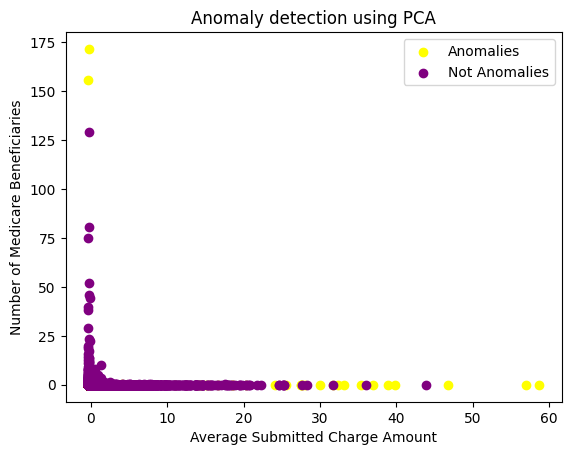

In [95]:
labels = [] 
non_anomalous = [] # list for storing the non annomalous 
for i in range(len(data)): 
    if(i in anomalous_indices_pca): 
        labels.append(1)  # label is 1 for anomalous 
    else:
        labels.append(0)  # lable is 0 for non anomalous 
        non_anomalous.append(i)
plt.title('Anomaly detection using PCA')
plt.scatter(data.iloc[anomalous_indices_pca].iloc[:,6] , data.iloc[anomalous_indices_pca].iloc[:,5] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,5] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Number of Medicare Beneficiaries')
plt.legend()

# ICA

In [96]:
from sklearn.decomposition import FastICA


In [97]:
ica = FastICA(n_components = 33, random_state=0) # ica with n component = 33 
data_ica = ica.fit_transform(data)

In [98]:
data_ica.shape

(100000, 33)

In [99]:
data_recon = ica.inverse_transform(data_ica)
error = np.mean(np.abs(data - data_recon), axis=1) # calculating the error in reconstruction 

# Flag anomalies
threshold = np.percentile(error, 95) # taking threshold = 95th  percentile 
anomalous_indices_ica = np.where(error > threshold)[0]  # iff error greater than the threshol d then anomalous


In [100]:
print(anomalous_indices_ica)

[   37    38    87 ... 99906 99918 99971]


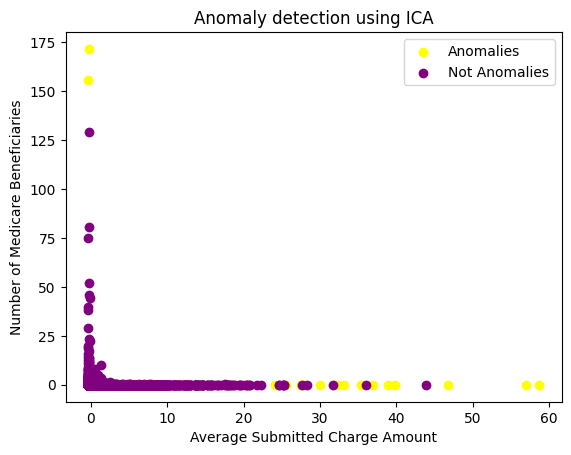

In [102]:
labels = [] 
non_anomalous = [] # list for storing non anomalous indices 
for i in range(len(data)): 
    if(i in anomalous_indices_ica): 
        labels.append(1) 
    else:
        labels.append(0)   
        non_anomalous.append(i) # non anomalous indices 

plt.title('Anomaly detection using ICA')
plt.scatter(data.iloc[anomalous_indices_pca].iloc[:,6] , data.iloc[anomalous_indices_pca].iloc[:,5] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,5] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Number of Medicare Beneficiaries')
plt.legend()

# ISOLATION FOREST With reduced data using PCA

In [108]:
from sklearn.ensemble import IsolationForest

In [109]:
clf = IsolationForest(n_estimators=100, contamination=0.05) # isolatoin forest training with n estimators = 100 and expected anomalies = 5% 
clf.fit(data_pca) # fitting the model with data transformed by pca 

IsolationForest(contamination=0.05)

In [110]:
y_pred = clf.predict(data_pca) 

In [111]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [112]:
anomalies_index_isol_for_pca = [] 

for i in range(len(y_pred)): 
    if(y_pred[i] ==-1):
        anomalies_index_isol_for_pca.append(i)
#         print(i,end = " ")

In [113]:
anomalies_index_isol_for_pca = np.array(anomalies_index_isol_for_pca) 

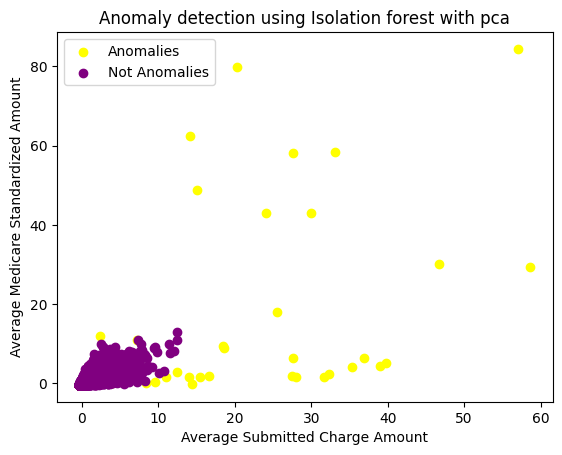

In [114]:
labels = []  
non_anomalous = []
for i in range(len(data)): 
    if(i in anomalies_index_isol_for_pca): 
        labels.append(1) 
    else:
        labels.append(0)  
        non_anomalous.append(i)  # non anomalous indices 
plt.title('Anomaly detection using Isolation forest with pca')
plt.scatter(data.iloc[anomalous_indices_pca].iloc[:,6] , data.iloc[anomalous_indices_pca].iloc[:,7] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,7] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Average Medicare Standardized Amount')
plt.legend()

# ISOLATION FOREST With reduced data using ICA

In [116]:
clf = IsolationForest(n_estimators=100, contamination=0.05)
clf.fit(data_ica) # by using data transformed by ica 

IsolationForest(contamination=0.05)

In [117]:
y_pred = clf.predict(data_ica) 

In [118]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [119]:
anomalies_index_isol_for_ica = []
for i in range(len(y_pred)): 
    if(y_pred[i] ==-1):
        anomalies_index_isol_for_ica.append(i)
#         print(i,end = " ")

In [120]:
anomalies_index_isol_for_ica = np.array(anomalies_index_isol_for_ica)

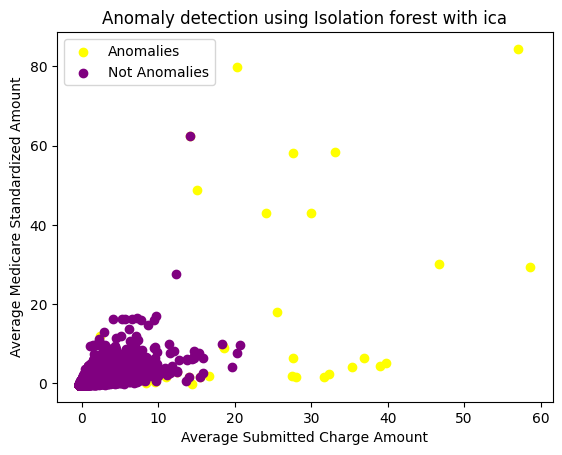

In [121]:
labels = []  
non_anomalous = []
for i in range(len(data)): 
    if(i in anomalies_index_isol_for_ica): 
        labels.append(1) 
    else:
        labels.append(0)  
        non_anomalous.append(i)
# plt.scatter(data.iloc[:,6],data.iloc[:,7],c = labels) 
plt.title('Anomaly detection using Isolation forest with ica')
plt.scatter(data.iloc[anomalous_indices_pca].iloc[:,6] , data.iloc[anomalous_indices_pca].iloc[:,7] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,7] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Average Medicare Standardized Amount')
plt.legend()

# ISOLATION FOREST

In [123]:
clf = IsolationForest(n_estimators=100, contamination=0.05)
clf.fit(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [124]:
y_pred = clf.predict(data)

In [125]:
anomalies_indices_isol_for = [] 
for i in range(len(y_pred)): 
    if(y_pred[i]==-1): 
        anomalies_indices_isol_for.append(i) 
anomalies_indices_isol_for = np.array(anomalies_indices_isol_for)

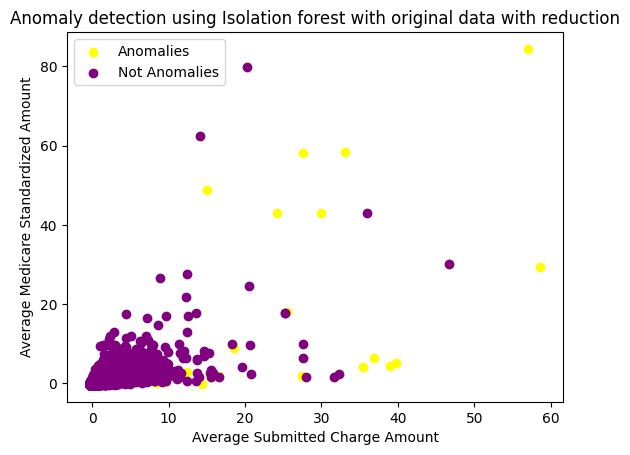

In [126]:
labels = []  
non_anomalous = []
for i in range(len(data)): 
    if(i in anomalies_indices_isol_for): 
        labels.append(1) 
    else:
        labels.append(0)  
        non_anomalous.append(i)
# plt.scatter(data.iloc[:,6],data.iloc[:,7],c = labels)/
plt.title('Anomaly detection using Isolation forest with original data with reduction')
plt.scatter(data.iloc[anomalous_indices_pca].iloc[:,6] , data.iloc[anomalous_indices_pca].iloc[:,7] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,7] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Average Medicare Standardized Amount')
plt.legend()

# DBSCAN

In [128]:
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors

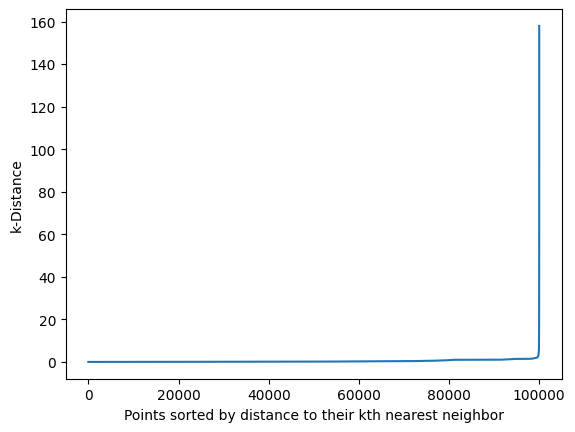

In [129]:
neigh = NearestNeighbors(n_neighbors= 20 ) # training nearest neighbors model with n_neighbors = 20 
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
k_distances = np.sort(distances[:, 19], axis=0)

# Plot the k-distance graph
plt.plot(np.arange(len(data)), k_distances)
plt.xlabel('Points sorted by distance to their kth nearest neighbor')
plt.ylabel('k-Distance')
plt.show()

From the plot looks like the value of k -distance where it changes is nearly 0 so taking value of eplison = 0.5

<!-- From the plot knee points seems to be around 2(on y_axis) because after this value the distance of nearest neighbors become constant -->

In [130]:
dbscan = DBSCAN(0.5) 
pred = dbscan.fit_predict(data)    
print(pred)

[   0    1    2 ...   18 1030 1681]


In [131]:
anomalies_dbscan = [] 
for i in range(len(pred)): 
    if(pred[i] ==-1): 
        anomalies_dbscan.append(i) # finding the outliers and taking that as anomalies 

In [132]:
print(len(anomalies_dbscan))

8039


In [133]:
labels = []  
non_anomalous = []
for i in range(len(pred)):
    if(pred[i]==-1):
        labels.append(1) 
    else:
        labels.append(0) 
        non_anomalous.append(i)

In [136]:
anomalies_indices_dbscan = []
for i in range(len(pred)): 
    if(pred[i]==-1): 
        anomalies_indices_dbscan.append(i)

In [137]:
anomalies_indices_dbscan = np.array(anomalies_indices_dbscan)

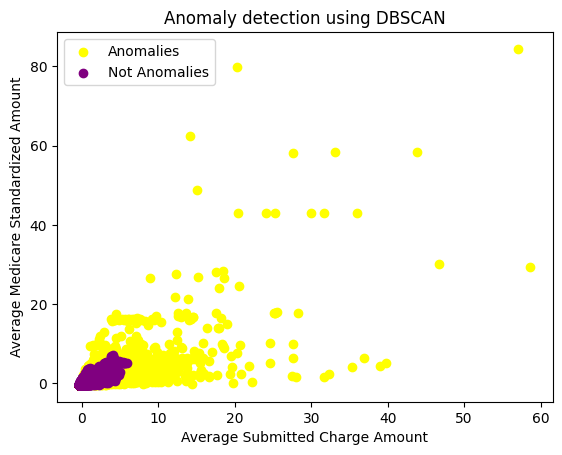

In [138]:
plt.title('Anomaly detection using DBSCAN')
plt.scatter(data.iloc[anomalies_indices_dbscan].iloc[:,6] , data.iloc[anomalies_indices_dbscan].iloc[:,7] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,7] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Average Medicare Standardized Amount')
plt.legend()

# SVD

In [139]:
U, s, V = np.linalg.svd(data, full_matrices=False) # finding the three components of svd 


error = np.sum((data - U @ np.diag(s) @ V)**2, axis=1)

threshold = np.percentile(error, 95)

# Identify anomalies
anomalies_indices_svd = np.where(error > threshold)[0]

print("Anomalies:", anomalies_indices_svd)

Anomalies: [    0     1     2 ... 99955 99960 99992]


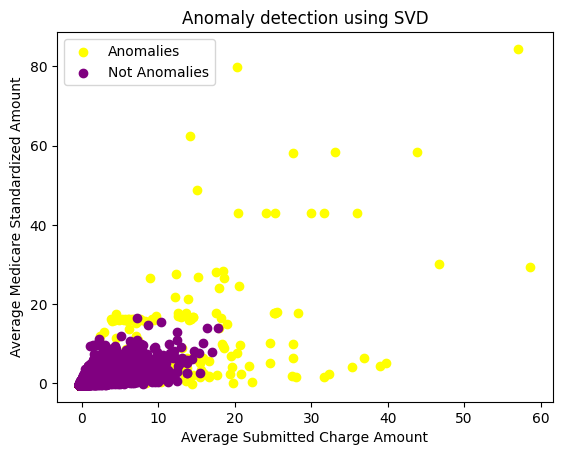

In [140]:
labels = []  
non_anomalous = []
for i in range(len(data)): 
    if(i in anomalies_indices_svd): 
        labels.append(1) 
    else:
        labels.append(0)  
        non_anomalous.append(i)
# plt.scatter(data.iloc[:,6],data.iloc[:,7],c = labels) 
plt.title('Anomaly detection using SVD')
plt.scatter(data.iloc[anomalies_indices_svd].iloc[:,6] , data.iloc[anomalies_indices_svd].iloc[:,7] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,7] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Average Medicare Standardized Amount')
plt.legend()

In [142]:
print(anomalies_indices_svd)


[    0     1     2 ... 99955 99960 99992]


# Anomalies 

In [143]:
print(anomalous_indices_ica) 
print(anomalous_indices_pca) 
print(anomalies_index_isol_for_pca)
print(anomalies_index_isol_for_ica) 
print(anomalies_indices_isol_for) 
print(anomalies_indices_dbscan) 
print(anomalies_indices_svd)

[   37    38    87 ... 99906 99918 99971]
[   37    38    87 ... 99906 99918 99971]
[   23    39    59 ... 99942 99954 99995]
[   25    37    38 ... 99954 99960 99971]
[   25    37    78 ... 99950 99971 99973]
[   49    72    78 ... 99954 99960 99976]
[    0     1     2 ... 99955 99960 99992]


In [144]:
print(len(anomalous_indices_ica))
print(len(anomalous_indices_pca))
print(len(anomalies_index_isol_for_pca))
print(len(anomalies_index_isol_for_ica) )
print(len(anomalies_indices_isol_for) )
print(len(anomalies_indices_dbscan)) 
print(len(anomalies_indices_svd))

5000
5000
5000
5000
5000
8039
5000


In [145]:
anomalies = list(anomalous_indices_ica) +list(anomalous_indices_pca) +list(anomalies_index_isol_for_pca)+list(anomalies_index_isol_for_ica) +list(anomalies_indices_isol_for) +list(anomalies_indices_dbscan) +list(anomalies_indices_svd)

In [146]:
counter = Counter(anomalies)

In [147]:
final_anomalies = [] 
for i in counter: 
    if(counter[i]>=2): 
        final_anomalies.append(i) 
print(len(final_anomalies))

9942


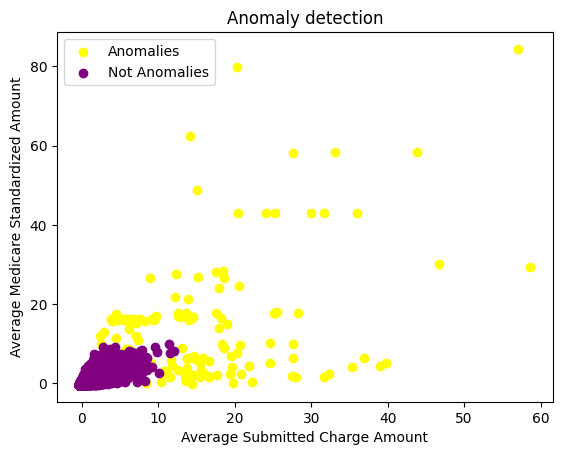

In [148]:
labels = []  
non_anomalous = []
for i in range(len(data)): 
    if(i in final_anomalies): 
        labels.append(1) 
    else: 
        labels.append(0)  
        non_anomalous.append(i)
# plt.scatter(data.iloc[:,6],data.iloc[:,7],c = labels) 
plt.title('Anomaly detection')
plt.scatter(data.iloc[anomalies_indices_svd].iloc[:,6] , data.iloc[anomalies_indices_svd].iloc[:,7] , c = 'yellow',label = 'Anomalies') 
plt.scatter(data.iloc[non_anomalous].iloc[:,6] , data.iloc[non_anomalous].iloc[:,7] , c = 'purple',label = 'Not Anomalies')  
plt.xlabel('Average Submitted Charge Amount') 
plt.ylabel('Average Medicare Standardized Amount')
plt.legend()

In [149]:
new_df = data.copy() 
new_df['Fraud'] = np.zeros(len(df))  
new_df['Fraud'] = new_df['Fraud'].astype('int64')

In [150]:
new_df

,Gender of the Provider,Country Code of the Provider,Medicare Participation Indicator,Place of Service,HCPCS Drug Indicator,Number of Medicare Beneficiaries,Average Submitted Charge Amount,Average Medicare Standardized Amount,Credentials of the Provider_0,Credentials of the Provider_1,...,Provider Type_17,Provider Type_18,Provider Type_19,Provider Type_20,Provider Type_21,Provider Type_22,Provider Type_23,Provider Type_24,Provider Type_25,Fraud
0,0,0,0,0,0,-0.059308,-0.046433,0.414299,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0.076775,0.182805,0.286359,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,-0.069222,-0.187794,-0.087154,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,-0.064716,-0.328957,-0.372921,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,-0.059308,-0.296019,-0.294800,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,-0.062913,-0.132270,-0.078893,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,1,0,0.015493,-0.198097,-0.204907,1,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,0,0,0,0,-0.071024,-0.230571,-0.316983,0,1,...,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,1,0,-0.070123,-0.272492,-0.263495,0,1,...,0,0,0,0,0,0,0,0,0,0


In [151]:
for i in anomalies:
    new_df['Fraud'][i] = 1

C:\Users\91860\AppData\Local\Temp\ipykernel_16500\2305599093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Fraud'][i] = 1


# PREDICTION FOR NEW TEST DATA 

Now we will convert our unsupervised data to supervised and apply supervised classifier algorithms to get better results of data for the new coming data to predict whether it is fraud  or not. 

In [152]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

In [153]:
clf1 = RandomForestClassifier() 
clf2 = GaussianNB() 
clf3 = SVC() 
clf4 = LogisticRegression() 
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('gnb', clf2), ('svc', clf3),('lr',clf4)], voting='hard')

In [154]:
voting_clf.fit(new_df.iloc[:,:-1],new_df.iloc[:,-1])  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB()), ('svc', SVC()),
                             ('lr', LogisticRegression())])

In [155]:
def predict(X_test,Encodings,standardizations,voting_clf,columns):  # function for prediction 
    # as we will have inputs in the original format and we have transformed that so ...
    # ... we need to change the original data in the form of transformed so we will first perform following....
    # .. before prediction 
    test = pd.DataFrame(columns = columns)  # creating the new test data with all 0's 
    for i in range(len(X_test)): 
        arr = []
        for j in range(60): 
            arr.append(0)  
#         print(len(test))
        test.loc[len(test)] = arr  
    iterator = 0 
    for i in X_test.index: 
        continuous_features = ['Number of Medicare Beneficiaries','Average Submitted Charge Amount','Average Medicare Standardized Amount'] 
        for j in continuous_features:  
#             print(X_test[j][i],standardizations['mean'][j],standardizations['std'][j] )
            test[j][iterator] = (X_test[j][i] - standardizations['mean'][j])/standardizations['std'][j]    
        not_one_hot = ['Gender of the Provider','Country Code of the Provider','Medicare Participation Indicator','Place of Service','HCPCS Drug Indicator'] 
 
        for j in X_test.columns:
            if j not in continuous_features:   # for the values which are not continuous .. 
                # if it is not encoded by one hot encoding then providing the code as in the dictionary Encodings 
                if j in not_one_hot: 
                    val = X_test[j][i]  
                    code = Encodings[j][val] 
                    if val not in Encodings[j]:
                        code = 1
                    
                    test[j][iterator]  = code 
                else:
                    val = X_test[j][i]  
                    if(val in Encodings[j]):
                        code = Encodings[j][val]  # getting the code 
                    else:
                        code = 0 
                    new_col = j + '_' + str(code)   # getting that column 
    #                 print(new_col)
                    if(new_col in test.columns): 
                        test[new_col][iterator] = 1 
        iterator+=1 
    y_pred = voting_clf.predict(test) 
    return y_pred

This function will take 11 features from the data as input from the user and return the predicted value fraud or not fraud